# Proyecto Davivienda. Rivera y Chavarro

In [ ]:
import pandas as pd
import numpy as np

# Carga de datos

In [ ]:
data = pd.read_csv("train_precios_vivienda.csv")
data.head()

<ipython-input-285-9869e018a60e>:1: DtypeWarning: Columns (67,109,110,160,168,169,170,171,178,180) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("train_precios_vivienda.csv")


,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,4112,5896,43090.624747,Remate,Remates,GarantÃ­a Hipotecaria,Remates,Vivienda,NaN,VALLE DEL CAUCA,...,"81968750,00",0,0,0,0,"145318750,00",2522304,"576134,95",0.000000,0.000000
1,7401,10570,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,QUINDÃO,...,0,157,78500000,No,0,713986654,257.23250000000002,2775647.14,-75.661152,4.544027
2,10223,14600,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,...,0,0,0,Si,0,270500000,259.4264,1042684.94,-75.584116,6.277020
3,4170,5967,43091.676139,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,CUNDINAMARCA,...,0,0,0,No,0,"84840000,00",252245,"336339,67",0.000000,0.000000
4,11073,15814,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,META,...,69306400,0,0,0,0,96346400,259.72770000000003,370951.58,-73.712370,3.565757


In [ ]:
data.shape

(11571, 222)

In [ ]:
data.dtypes

Unnamed: 0               int64
id                       int64
fecha_aprobación       float64
objeto                  object
motivo                  object
                        ...   
valor_total_avaluo      object
valor_uvr               object
valor_avaluo_en_uvr     object
Longitud               float64
Latitud                float64
Length: 222, dtype: object

# Eliminación inicial variables innecesarias

Se investigó lo que significaban varias de las columnas del dataset para tomar la decisión de si eran importantes o no, al igual que identificamos las de valor único para eliminarlas de una vez

In [ ]:
# Lista de columnas a eliminar pt1
columns_to_drop = [
    "numero_deposito_1", "matricula_inmobiliaria_deposito_1", "numero_deposito_2", "matricula_inmobiliaria_deposito_2",
    "numero_deposito_3", "matricula_inmobiliaria_deposito_3", "numero_deposito_4", "matricula_inmobiliaria_deposito_4",
    "numero_deposito_5", "matricula_inmobiliaria_deposito_5", "numero_garaje_1", "matricula_garaje_1", "garaje_cubierto_1",
    "garaje_doble_1", "garaje_paralelo_1", "garaje_servidumbre_1", "numero_garaje_2", "matricula_garaje_2", "garaje_cubierto_2",
    "garaje_doble_2", "garaje_paralelo_2", "garaje_servidumbre_2", "numero_garaje_3", "matricula_garaje_3", "garaje_cubierto_3",
    "garaje_doble_3", "garaje_paralelo_3", "garaje_servidumbre_3", "numero_garaje_4", "matricula_garaje_4", "garaje_cubierto_4",
    "garaje_doble_4", "garaje_paralelo_4", "garaje_servidumbre_4", "numero_garaje_5", "matricula_garaje_5", "garaje_cubierto_5",
    "garaje_doble_5", "garaje_paralelo_5", "garaje_servidumbre_5","id","Unnamed: 0", "fecha_aprobación", "descripcion_general_sector", "perspectivas_de_valorizacion",
    "actualidad_edificadora", "comportamiento_oferta_demanda",'metodo_valuacion_1',
       'concepto_del_metodo_1', 'metodo_valuacion_2', 'concepto_del_metodo_2',
       'metodo_valuacion_3', 'concepto_del_metodo_3', 'metodo_valuacion_4',
       'concepto_del_metodo_4', 'metodo_valuacion_5', 'concepto_del_metodo_5',
       'metodo_valuacion_6', 'concepto_del_metodo_6', 'metodo_valuacion_7',
       'concepto_del_metodo_7', 'metodo_valuacion_8', 'concepto_del_metodo_8',
       'metodo_valuacion_9', 'concepto_del_metodo_9'
]

data.drop(columns=columns_to_drop, inplace=True)
# Verificar las columnas restantes para confirmar la eliminación
print(data.columns)

Index(['objeto', 'motivo', 'proposito', 'tipo_avaluo', 'tipo_credito',
       'tipo_subsidio', 'departamento_inmueble', 'municipio_inmueble',
       'barrio', 'sector',
       ...
       'valor_area_construccion', 'area_otros', 'valor_area_otros',
       'area_libre', 'valor_area_libre', 'valor_total_avaluo', 'valor_uvr',
       'valor_avaluo_en_uvr', 'Longitud', 'Latitud'],
      dtype='object', length=157)


In [ ]:
data.shape

(11571, 157)

In [ ]:
data.head()

,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,barrio,sector,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,Remate,Remates,GarantÃ­a Hipotecaria,Remates,Vivienda,NaN,VALLE DEL CAUCA,TULUA,VICTORIA,Urbano,...,"81968750,00",0,0,0,0,"145318750,00",2522304,"576134,95",0.000000,0.000000
1,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,QUINDÃO,ARMENIA,SECTOR CLINICAS,Urbano,...,0,157,78500000,No,0,713986654,257.23250000000002,2775647.14,-75.661152,4.544027
2,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,MEDELLIN,ROBLEDO PILARICA,Urbano,...,0,0,0,Si,0,270500000,259.4264,1042684.94,-75.584116,6.277020
3,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,CUNDINAMARCA,SOACHA,CIUDAD VERDE,Urbano,...,0,0,0,No,0,"84840000,00",252245,"336339,67",0.000000,0.000000
4,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,META,GRANADA,BULEVAR ETAPA II,Urbano,...,69306400,0,0,0,0,96346400,259.72770000000003,370951.58,-73.712370,3.565757


# Manejo de nulos inicial

In [ ]:
# Identificar las columnas que contienen valores nulos
columns_with_nulls = data.columns[data.isnull().any()].tolist()

# Mostrar las columnas con valores nulos
print("Columnas con valores nulos:", columns_with_nulls)
print(len( columns_with_nulls))

Columnas con valores nulos: ['tipo_subsidio', 'barrio', 'sector', 'descripcion_tipo_inmueble', 'descripcion_uso_inmueble', 'descripcion_clase_inmueble', 'area_actividad', 'observaciones_estructura', 'observaciones_dependencias', 'observaciones_generales_construccion', 'Latitud']
11


In [ ]:
# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Crear un DataFrame para visualizar el porcentaje de valores faltantes por columna
missing_percentage_df = pd.DataFrame({'Missing Percentage': missing_percentage}).sort_values(by='Missing Percentage', ascending=False)

# Imprimir las columnas ordenadas por porcentaje de valores faltantes
print(missing_percentage_df)

                                      Missing Percentage
tipo_subsidio                                  88.315617
descripcion_uso_inmueble                        1.944516
descripcion_clase_inmueble                      1.884020
descripcion_tipo_inmueble                       1.884020
observaciones_generales_construccion            0.129634
...                                                  ...
predio_subdividido_fisicamente                  0.000000
unidades                                        0.000000
contadores_agua                                 0.000000
contadores_luz                                  0.000000
vigilancia_privada                              0.000000

[157 rows x 1 columns]


In [ ]:
# Verificar los  valores faltantes
print("\nValores faltantes en el DataFrame 'Precios de Vivienda':")
data.isnull().sum()


Valores faltantes en el DataFrame 'Precios de Vivienda':


objeto                 0
motivo                 0
proposito              0
tipo_avaluo            0
tipo_credito           0
                      ..
valor_total_avaluo     0
valor_uvr              0
valor_avaluo_en_uvr    0
Longitud               0
Latitud                1
Length: 157, dtype: int64

Se eliminan los valores faltantes que tengan un bajo porcentaje, debido a que se tiene un gran Volumen de datos

In [ ]:
# Identificamos todas las columnas excepto 'tipo_subsidio' y 'fecha_aprobación'
columns_to_consider = data.columns.difference(['tipo_subsidio', 'fecha_aprobación'])

# Eliminamos registros que tienen valores faltantes en cualquiera de las columnas consideradas
data_cleaned = data.dropna(subset=columns_to_consider, how='any')

# Comparamos el tamaño original del DataFrame con el tamaño después de la limpieza
original_size = data.shape[0]
cleaned_size = data_cleaned.shape[0]

print(f'Original size: {original_size}, Cleaned size: {cleaned_size}')

Original size: 11571, Cleaned size: 11322


In [ ]:
data_cleaned.shape

(11322, 157)

In [ ]:
data = data_cleaned

In [ ]:
data.shape

(11322, 157)

In [ ]:
# Identificar las columnas que contienen valores nulos
columns_with_nulls = data.columns[data.isnull().any()].tolist()

# Mostrar las columnas con valores nulos
print("Columnas con valores nulos:", columns_with_nulls)

Columnas con valores nulos: ['tipo_subsidio']


# Transformación de columnas/variables

## Correción de caracteres especiales

In [ ]:
!pip install ftfy


In [ ]:
import ftfy
# Definir una función para corregir problemas de codificación solo en texto
def fix_text_in_column(text):
    if isinstance(text, str):
        return ftfy.fix_text(text)
    else:
        return text

# Aplicar la función a las columnas de texto
text_columns = data.select_dtypes(include='object').columns
data[text_columns] = data[text_columns].applymap(fix_text_in_column)

# Verificar si los caracteres extraños se han eliminado correctamente en algunas de las columnas
print(data[['objeto', 'motivo', 'proposito', 'departamento_inmueble']].head())

        objeto                           motivo             proposito  \
0       Remate                          Remates  Garantía Hipotecaria   
1  Originación  Crédito hipotecario de vivienda  Garantía Hipotecaria   
2  Originación  Crédito hipotecario de vivienda  Garantía Hipotecaria   
3  Originación  Crédito hipotecario de vivienda  Garantía Hipotecaria   
4  Originación  Crédito hipotecario de vivienda  Garantía Hipotecaria   

  departamento_inmueble  
0       VALLE DEL CAUCA  
1               QUINDÍO  
2             ANTIOQUIA  
3          CUNDINAMARCA  
4                  META  


## Transformación de variables descripción/observación

In [ ]:
# Lista de columnas a procesar
columnas_descripcion = ['descripcion_uso_inmueble', 'descripcion_tipo_inmueble', 'descripcion_clase_inmueble']

# Reemplazar '0' por 'Sin descripción' y otros valores por 'Con descripción' en las columnas de descripción
for columna in columnas_descripcion:
    data[columna] = data[columna].apply(lambda x: 'Sin descripción' if x == '0' else 'Con descripción')


In [ ]:
# Imprimir los valores únicos en las columnas de descripción
for columna in columnas_descripcion:
    print("Valores únicos en la columna", columna)
    print(data[columna].unique())
    print()

Valores únicos en la columna descripcion_uso_inmueble
['Sin descripción' 'Con descripción']

Valores únicos en la columna descripcion_tipo_inmueble
['Sin descripción' 'Con descripción']

Valores únicos en la columna descripcion_clase_inmueble
['Sin descripción' 'Con descripción']



In [ ]:
# Lista de columnas de observacón
columnas_observaciones = ['observaciones_altura_permitida', 'observaciones_aislamiento_posterior',
    'observaciones_aislamiento_lateral', 'observaciones_antejardin',
    'observaciones_indice_ocupacion', 'observaciones_indice_construccion', 'observaciones_generales_inmueble',
    'observaciones_estructura', 'observaciones_dependencias']

for columna in columnas_observaciones:
    data[columna] = data[columna].apply(lambda x: 'Sin observación' if x == '0' else 'Con observación')

In [ ]:
# Imprimir los valores únicos en las columnas de descripción
for columna in columnas_observaciones:
    print("Valores únicos en la columna", columna)
    print(data[columna].unique())
    print()


Valores únicos en la columna observaciones_altura_permitida
['Con observación' 'Sin observación']

Valores únicos en la columna observaciones_aislamiento_posterior
['Sin observación' 'Con observación']

Valores únicos en la columna observaciones_aislamiento_lateral
['Sin observación' 'Con observación']

Valores únicos en la columna observaciones_antejardin
['Sin observación' 'Con observación']

Valores únicos en la columna observaciones_indice_ocupacion
['Con observación' 'Sin observación']

Valores únicos en la columna observaciones_indice_construccion
['Sin observación' 'Con observación']

Valores únicos en la columna observaciones_generales_inmueble
['Con observación' 'Sin observación']

Valores únicos en la columna observaciones_estructura
['Con observación']

Valores únicos en la columna observaciones_dependencias
['Con observación' 'Sin observación']



## Preprocesamiento variables categóricas

In [ ]:
category_found = False
for col_name, dtype in data.dtypes.items():
    if dtype.name == 'category':
        print(f"La columna '{col_name}' es de tipo 'category'.")
        category_found = True

if not category_found:
    print("No se encontraron columnas de tipo 'category'.")

No se encontraron columnas de tipo 'category'.


In [ ]:
# Lista de columnas
columnas_acabados = ['estado_acabados_pisos', 'calidad_acabados_pisos',
                     'estado_acabados_muros', 'calidad_acabados_muros',
                     'estado_acabados_techos', 'calidad_acabados_techos',
                     'estado_acabados_madera', 'calidad_acabados_madera',
                     'estado_acabados_metal', 'calidad_acabados_metal',
                     'estado_acabados_banos', 'calidad_acabados_banos',
                     'estado_acabados_cocina', 'calidad_acabados_cocina']

# Realizar un recuento de las variables únicas en cada columna
for columna in columnas_acabados:
    print("Recuento de variables en la columna:", columna)
    print(data[columna].value_counts())
    print()


Recuento de variables en la columna: estado_acabados_pisos
estado_acabados_pisos
Bueno                                                                                                                                                              10579
Sin acabados                                                                                                                                                         376
Regular                                                                                                                                                              228
0                                                                                                                                                                     36
Malo                                                                                                                                                                  13
                                                                          

## Manejo de valores corridos/incoherentes

In [ ]:
# Variables a eliminar de la columna estado_acabados_pisos
variables_eliminar_estado_acabados_pisos = [
    'el Apto cuenta con vista al interior y exterior del conjunto.',
    'El inmueble cuenta con buena distribución de sus espacios.',
    'de espacios amplios con buena iluminación y ventilación.',
    'Se realiza una inspección de estas y se nota claramente que se encuentran completamente en obra blanca.',
    'de espacios amplios con buena iluminación y ventilación.',
    'Sala-comedor, cocina y baño // Segunda planta',
    'adicionalmente cuenta con 1 beneficiadero de cafe',
    'el Apto cuenta con vista al interior y exterior del conjunto.',
    'La casa cuenta con 5 alcobas, sala, comedor, cocina, baño social, baño familiar, 2 baños privados, zona de lavado, terrraza  y antejerdìn.',
    'Piso 2: Baño y 2 alcobas',
    'segundo piso: habitacional independiente, con dos alcobas, cocina, baño general y sala comedor',
    'Consta de: Salón sala comedor, cocina integral, zona de ropas con lavadero, una alcoba con closet y un baño privado. Tiene garaje para moto asignado por escritura pública RPH',
    'en 2 piso 3 aptos cada uno con sala, comedor cocina, ropas, baño y 2 alcobas',
    'Apto 1: Comedor, un baño, dos alcobas, cocina y patio de ropas. Segundo piso'
]

# Variables a eliminar de la columna calidad_acabados_pisos
variables_eliminar_calidad_acabados_pisos = [
    'y en 3 piso un apartamento con sala, comedor, cocina, ropas, baño y 2 alcobas.',
    'tercer piso, aún no se puede preci',
    'Piso 3: Alcoba con baño privado y terraza. Las dependencias cuenta con buena iluminación  ventilación natural.',
    'Regular',
    'Una alcoba.',
    'Apto 2: Sala-comedor, dos alcobas, cocina y baño. Terraza.',
    'Sin acabados'
]

# Variables a eliminar de la columna estado_acabados_muros
variables_eliminar_estado_acabados_muros = [
    'Normal',
    'Sencillo',
    'Sin Acabados'
]

# Variables a eliminar de la columna calidad_acabados_muro
variables_eliminar_calidad_acabados_muro = [
    'Sin acabados',
    'Bueno',
    'Regular'
]

# Variables a eliminar de la columna estado_acabados_techos
variables_eliminar_estado_acabados_techos = [
    'Sin Acabados',
    'Normal',
    'Sencillo'
]

# Variables a eliminar de la columna calidad_acabados_techos
variables_eliminar_calidad_acabados_techos = [
    'Sin acabados',
    'Bueno',
    'Regular'
]

# Variables a eliminar de la columna estado_acabados_madera
variables_eliminar_estado_acabados_madera = [
    'Sin Acabados',
    'Normal',
    'Sencillo'
]

# Variables a eliminar de la columna calidad_acabados_madera
variables_eliminar_calidad_acabados_madera = [
    'Sin acabados',
    'Bueno',
    'Regular'
]

# Variables a eliminar de la columna estado_acabados_metal
variables_eliminar_estado_acabados_metal = [
    'Normal',
    'Sin Acabados',
    'Sencillo'
]

# Variables a eliminar de la columna calidad_acabados_metal
variables_eliminar_calidad_acabados_metal = [
    'Bueno',
    'Regular'
]

# Variables a eliminar de la columna estado_acabados_banos
variables_eliminar_estado_acabados_banos = [
    'Normal',
    'Sencillo'
]

# Variables a eliminar de la columna calidad_acabados_banos
variables_eliminar_calidad_acabados_banos = [
    'Regular'
]

# Variables a eliminar de la columna estado_acabados_cocina
variables_eliminar_estado_acabados_cocina = [
    'Normal',
    'Sencillo'
]

# Variables a eliminar de la columna calidad_acabados_cocina
variables_eliminar_calidad_acabados_cocina = [
    'Bueno',
    'Normal',
    'Regular'
]

# Reemplazar las variables en cada columna
data['estado_acabados_pisos'].replace(variables_eliminar_estado_acabados_pisos, np.nan, inplace=True)
data['calidad_acabados_pisos'].replace(variables_eliminar_calidad_acabados_pisos, np.nan, inplace=True)
data['estado_acabados_muros'].replace(variables_eliminar_estado_acabados_muros, np.nan, inplace=True)
data['calidad_acabados_muros'].replace(variables_eliminar_calidad_acabados_muro, np.nan, inplace=True)
data['estado_acabados_techos'].replace(variables_eliminar_estado_acabados_techos, np.nan, inplace=True)
data['calidad_acabados_techos'].replace(variables_eliminar_calidad_acabados_techos, np.nan, inplace=True)
data['estado_acabados_madera'].replace(variables_eliminar_estado_acabados_madera, np.nan, inplace=True)
data['calidad_acabados_madera'].replace(variables_eliminar_calidad_acabados_madera, np.nan, inplace=True)
data['estado_acabados_metal'].replace(variables_eliminar_estado_acabados_metal, np.nan, inplace=True)
data['calidad_acabados_metal'].replace(variables_eliminar_calidad_acabados_metal, np.nan, inplace=True)
data['estado_acabados_banos'].replace(variables_eliminar_estado_acabados_banos, np.nan, inplace=True)
data['calidad_acabados_banos'].replace(variables_eliminar_calidad_acabados_banos, np.nan, inplace=True)
data['estado_acabados_cocina'].replace(variables_eliminar_estado_acabados_cocina, np.nan, inplace=True)
data['calidad_acabados_cocina'].replace(variables_eliminar_calidad_acabados_cocina, np.nan, inplace=True)


In [ ]:
# Eliminar las variables 'MEDELLIN' de la columna 'sector'
data['sector'] = data['sector'].replace('MEDELLIN', np.nan)

# Eliminar las variables 'Si' de las columnas 'topografia_sector', 'nivel_equipamiento_comercial', y 'transporte'
data['topografia_sector'] = data['topografia_sector'].replace('Si', np.nan)
data['nivel_equipamiento_comercial'] = data['nivel_equipamiento_comercial'].replace('Si', np.nan)
data['transporte'] = data['transporte'].replace('Si', np.nan)

# Eliminar las variables '3' de la columna 'condiciones_salubridad'
data['condiciones_salubridad'] = data['condiciones_salubridad'].replace('3', np.nan)

# Eliminar las variables 'buenas' de la columna 'demanda_interes'
data['demanda_interes'] = data['demanda_interes'].replace('buenas', np.nan)

# Eliminar las variables especificadas de la columna 'uso_actual'
data['uso_actual'] = data['uso_actual'].replace(['0', 'VER ANEXOS INFORME.', 'si', 'Ver informe', 'No', 'ESPACIOS PARA CUATRO PERSONAS', 'PATIO, BAÑERA, ZONA LIBRE', 'PATIO DE ROPAS, ALBERCA LAVADE', 'Ind. Textil y Cuero', 'Ind. Química', 'Ind. Otras', 'Ind. Madera y Muebles'], np.nan)

# Eliminar las variables especificadas de la columna 'clase_inmueble'
data['clase_inmueble'] = data['clase_inmueble'].replace(['0', 'VER ANEXOS INFORME.', 'Sin uso - Eriazo', 'Ver informe', 'desocupado', 'servicios con un solo', 'Sin uso - Vivienda', 'Si', '3 HABITACIONES, ALBERCA LAVADE', 'DOS HABITACIONES, COCINA SENCI', 'BUENAS COND PARA HABITAR'], np.nan)

# Eliminar las variables especificadas de la columna 'ocupante'
data['ocupante'] = data['ocupante'].replace(['0', 'VER ANEXOS INFORME.', 'Vivienda', 'Ver informe', 'PATIO DE ROPAS, ALBERCA LAVADE', 'PATIO, BAÑERA, ZONA LIBRE', '10 pisos', 'ESPACIOS PARA CUATRO PERSONAS', 'Trifamiliar', 'BAÑO PRIVADO, Y GARAJE', 'contador de tres alcobas c/u'], np.nan)

# Eliminar las variables especificadas de la columna 'altura_permitida'
data['altura_permitida'] = data['altura_permitida'].replace(['0', 'No', 'Si', 'Propietario', 'SinOcupante', 'Unifamiliar', 'terraza cubierta y descubierta'], np.nan)

# Eliminar las variables especificadas de la columna 'aislamiento_posterior'
data['aislamiento_posterior'] = data['aislamiento_posterior'].replace(['0', '3', '2', '4', 'Si', '1', 'No', 'SinOcupante'], np.nan)

# Eliminar las variables especificadas de la columna 'aislamiento_lateral'
data['aislamiento_lateral'] = data['aislamiento_lateral'].replace(['0', '3', '2'], np.nan)

# Eliminar las variables especificadas de la columna 'antejardin'
data['antejardin'] = data['antejardin'].replace(['0', '3', '2'], np.nan)

# Eliminar las variables especificadas de la columna 'indice_ocupacion'
data['indice_ocupacion'] = data['indice_ocupacion'].replace(['0', '3', '1,5', '1,8', '2,5', '3.5'], np.nan)

# Eliminar las variables especificadas de la columna 'indice_construccion'
data['indice_construccion'] = data['indice_construccion'].replace(['0', '0,7', '0,8', '0,6', '1', '0,14', '0,875', '0.75', '1,5'], np.nan)

# Eliminar las variables especificadas de la columna 'estructura'
data['estructura'] = data['estructura'].replace(['2011', '18', '2007', '4', 'Si', '10', '19', '2000', '9', '8', '5', '36', '2008', '32', '3', '29', '2001', '2017', '2015', '2012', '2010', '28', '1', '2', '0'], np.nan)

# Eliminar las variables especificadas de la columna 'ajustes_sismoresistentes'
data['ajustes_sismoresistentes'] = data['ajustes_sismoresistentes'].replace(['Tradicional', 'Mamposteria Estructural', '1', 'Muro de carga', '0', '2', 'Industrializada', '5', '6', '2017', '7', '9', '18', '17', '16', '10'], np.nan)

# Eliminar las variables especificadas de la columna 'cubierta'
data['cubierta'] = data['cubierta'].replace(['Mamposteria Estructural', '1', 'Tradicional', 'No Reparados', 'Reparados', 'Muro de carga', '4', '2017', '2013', '0'], np.nan)

# Eliminar las variables especificadas de la columna 'fachada'
data['fachada'] = data['fachada'].replace(['Placa concreto imp.', 'Teja fibrocemento', 'No disponible', 'Teja de barro', 'Flotante', 'Mamposteria Estructural', 'Teja metálica', 'Industrializada', 'Tradicional', 'No Reparados', '1', 'Reparados', '4', '2016', '1994', '0'], np.nan)

# Eliminar las variables especificadas de la columna 'estructura_reforzada'
data['estructura_reforzada'] = data['estructura_reforzada'].replace(['Pañete y pintura', 'Ladrillo a la vista', 'Placa concreto imp.', 'De 0 a 3 metros', 'Graniplast', 'Teja fibrocemento', 'Teja de barro', '1', 'Otros', '2', 'Industrializada', 'Flotante', 'Tradicional'], np.nan)

# Eliminar las variables especificadas de la columna 'danos_previos'
data['danos_previos'] = data['danos_previos'].replace(['Trabes coladas en sitio', 'Mayor a 6 metros', 'No tiene trabes', 'De 3 a 6 metros', 'Pañete y pintura', 'Ladrillo a la vista', 'De 0 a 3 metros', 'Mamposteria Estructural', 'Placa concreto imp.'], np.nan)

# Eliminar las variables especificadas de la columna 'material_de_construccion'
data['material_de_construccion'] = data['material_de_construccion'].replace(['Sin daños previos', 'Madera', 'Mayor a 6 metros', 'Trabes coladas en sitio', 'Acero', 'De 3 a 6 metros', 'No tiene trabes', 'Pañete y pintura', 'Placa concreto imp.', 'De 0 a 3 metros', 'Teja fibrocemento'], np.nan)

# Eliminar las variables especificadas de la columna 'iluminacion'
data['iluminacion'] = data['iluminacion'].replace(['Muros', 'Pórticos no arriostrados', 'No existe', '0', 'Mampostería confinada', 'Adobe', 'Pórticos arriostrados', 'Paneles prefabricados', 'Sin daños previos', 'Concreto Reforzado', 'Mayor a 6 metros', 'No tiene trabes', 'Mixtas u Otro', 'Ladrillo a la vista', 'De 3 a 6 metros', 'Concreto Texturado', 'Sistema dual o combinado', 'Mampostería no reforzada', 'Mampostería reforzada', 'Pórticos'], np.nan)

# Eliminar las variables especificadas de la columna 'ventilacion'
data['ventilacion'] = data['ventilacion'].replace(['Mampostería reforzada', 'Mampostería no reforzada', 'Mampostería', 'Concreto Reforzado', 'No disponible', 'Mayor a 6 metros', 'Pórticos', 'Sistema dual o combinado', 'Sin daños previos', '0', 'Pórticos arriostrados', 'Mixtas u Otro', 'Mampostería confinada', 'Trabes coladas en sitio'], np.nan)

# Eliminar las variables especificadas de la columna 'irregularidad_planta'
data['irregularidad_planta'] = data['irregularidad_planta'].replace(['Bueno', 'Mampostería reforzada', 'Mampostería no reforzada', 'Paneles prefabricados', 'Trabes coladas en sitio', '0', 'Concreto Reforzado', 'Mampostería confinada', 'Pórticos no arriostrados', 'Regular', 'Sin daños previos'], np.nan)

# Eliminar las variables especificadas de la columna 'irregularidad_altura'
data['irregularidad_altura'] = data['irregularidad_altura'].replace(['Bueno', 'Sin daños previos', 'Concreto Reforzado', 'Mampostería', 'Muros'], np.nan)

# Eliminar las variables especificadas de la columna 'departamento_inmueble'
data['departamento_inmueble'] = data['departamento_inmueble'].replace(['Ochoa Vahos Alba del Carmen', 'Oscar Romel Castellanos Virguez y Otro', 'Lara Gomez Miguel Eduardo', 'Franco Emilio Ayala', 'Rios Duque Sandra Rafaela', 'Andres Felipe Orozco Vasquez', 'Anatilde Toro Echavarria', 'Alicia Maria Velez Restrepo', 'Velasquez Chica Enit Juliet'], np.nan)

# Eliminar las variables especificadas de la columna 'tipo_credito'
data['tipo_credito'] = data['tipo_credito'].replace(['0', 'Hipotecario'], np.nan)

# Eliminar las variables especificadas de la columna 'tipo_avaluo'
data['tipo_avaluo'] = data['tipo_avaluo'].replace(['Garantía Hipotecaria'], np.nan)

# Eliminar las variables especificadas de la columna 'proposito'
data['proposito'] = data['proposito'].replace(['0', 'Crédito hipotecario de vivienda'], np.nan)

# Eliminar las variables especificadas de la columna 'motivo'
data['motivo'] = data['motivo'].replace(['Originación', 'Reformas', '0'], np.nan)

# Eliminar las variables especificadas de la columna 'objeto'
data['objeto'] = data['objeto'].replace(['2018-06-19 19:48:27.269-05'], np.nan)

data['tipo_vigilancia'] = data['tipo_vigilancia'].replace(['0'], np.nan)

# Eliminar las filas que contienen valores nulos en esas columnas
columns_to_dropna = ['estado_acabados_pisos', 'calidad_acabados_pisos', 'estado_acabados_muros', 'calidad_acabados_muros',
                    'estado_acabados_techos', 'calidad_acabados_techos', 'estado_acabados_madera', 'calidad_acabados_madera',
                    'estado_acabados_metal', 'calidad_acabados_metal', 'estado_acabados_banos', 'calidad_acabados_banos',
                    'estado_acabados_cocina', 'calidad_acabados_cocina', 'objeto', 'observaciones_generales_inmueble', 'observaciones_estructura', 'observaciones_dependencias', 'motivo', 'proposito', 'descripcion_uso_inmueble', 'descripcion_tipo_inmueble', 'descripcion_clase_inmueble', 'observaciones_altura_permitida', 'observaciones_aislamiento_posterior',
    'observaciones_aislamiento_lateral', 'observaciones_antejardin', 'observaciones_indice_ocupacion', 'observaciones_indice_construccion', 'tipo_avaluo', 'tipo_credito', 'departamento_inmueble', 'municipio_inmueble',  'sector','topografia_sector','condiciones_salubridad','transporte','demanda_interes','nivel_equipamiento_comercial',
    'uso_actual','clase_inmueble','ocupante','altura_permitida','aislamiento_posterior','aislamiento_lateral','antejardin','indice_ocupacion','indice_construccion', 'estructura','ajustes_sismoresistentes','cubierta','fachada','estructura_reforzada','danos_previos','material_de_construccion','iluminacion','ventilacion','irregularidad_planta','irregularidad_altura']
data = data.dropna(subset=columns_to_dropna)

# Verifica el resultado
data.head()


,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,barrio,sector,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,Remate,Remates,Garantía Hipotecaria,Remates,Vivienda,NaN,VALLE DEL CAUCA,TULUA,VICTORIA,Urbano,...,"81968750,00",0,0,0,0,"145318750,00",2522304,"576134,95",0.000000,0.000000
1,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,QUINDÍO,ARMENIA,SECTOR CLINICAS,Urbano,...,0,157,78500000,No,0,713986654,257.23250000000002,2775647.14,-75.661152,4.544027
2,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,MEDELLIN,ROBLEDO PILARICA,Urbano,...,0,0,0,Si,0,270500000,259.4264,1042684.94,-75.584116,6.277020
3,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,CUNDINAMARCA,SOACHA,CIUDAD VERDE,Urbano,...,0,0,0,No,0,"84840000,00",252245,"336339,67",0.000000,0.000000
4,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,META,GRANADA,BULEVAR ETAPA II,Urbano,...,69306400,0,0,0,0,96346400,259.72770000000003,370951.58,-73.712370,3.565757


In [ ]:
print(data['estado_acabados_pisos'].unique())

['Bueno' 'Sin acabados' 'Regular' 'Malo']


In [ ]:
# Obtener las variables únicas y su recuento en cada columna
variables_y_recuento = {}
for columna in data.columns:
    if columna in columns_to_dropna:
        variables_y_recuento[columna] = {
            'variables': data[columna].unique(),
            'recuento': data[columna].value_counts()
        }

# Mostrar los resultados
for columna, info in variables_y_recuento.items():
    print("Columna:", columna)
    print("Variables únicas:")
    print(info['variables'])
    print("Recuento de cada variable:")
    print(info['recuento'])
    print()


Columna: objeto
Variables únicas:
['Remate' 'Originación']
Recuento de cada variable:
objeto
Originación    10719
Remate           326
Name: count, dtype: int64

Columna: motivo
Variables únicas:
['Remates' 'Crédito hipotecario de vivienda' 'Colomext Hipotecario'
 'Empleados' 'Leasing Habitacional' 'Garantía' 'Compra de cartera'
 'Crédito Comercial' 'Actualización de garantías' 'Dación en Pago'
 'Hipotecario Visto Bueno' 'Leasing Inmobiliario - Persona Natural'
 'Leasing Visto Bueno' 'Leasing Comercial']
Recuento de cada variable:
motivo
Crédito hipotecario de vivienda           8181
Leasing Habitacional                       922
Empleados                                  689
Remates                                    362
Colomext Hipotecario                       303
Compra de cartera                          225
Hipotecario Visto Bueno                    116
Dación en Pago                             113
Actualización de garantías                  61
Garantía                         

## Conversión variables a categoricas

In [ ]:
# Convertir columnas específicas a 'category'
columns_to_category = ['estado_acabados_pisos', 'calidad_acabados_pisos', 'estado_acabados_muros', 'calidad_acabados_muros',
                    'estado_acabados_techos', 'calidad_acabados_techos', 'estado_acabados_madera', 'calidad_acabados_madera',
                    'estado_acabados_metal', 'calidad_acabados_metal', 'estado_acabados_banos', 'calidad_acabados_banos',
                    'estado_acabados_cocina', 'calidad_acabados_cocina','objeto', 'tipo_inmueble', 'tipo_vigilancia', 'tipo_fachada', 'observaciones_generales_inmueble', 'observaciones_estructura', 'observaciones_dependencias', 'motivo', 'proposito', 'descripcion_uso_inmueble', 'descripcion_tipo_inmueble', 'descripcion_clase_inmueble', 'observaciones_altura_permitida', 'observaciones_aislamiento_posterior',
    'observaciones_aislamiento_lateral', 'observaciones_antejardin', 'observaciones_indice_ocupacion', 'observaciones_indice_construccion', 'tipo_avaluo', 'tipo_credito', 'departamento_inmueble', 'municipio_inmueble',  'sector','topografia_sector','condiciones_salubridad','transporte','demanda_interes','nivel_equipamiento_comercial',
    'uso_actual','clase_inmueble','ocupante','altura_permitida','aislamiento_posterior','aislamiento_lateral','antejardin','indice_ocupacion','indice_construccion', 'estructura','ajustes_sismoresistentes','cubierta','fachada','estructura_reforzada','danos_previos','material_de_construccion','iluminacion','ventilacion','irregularidad_planta','irregularidad_altura']
for column in columns_to_category:
    data[column] = data[column].astype('category')

print(data[columns_to_category].dtypes)

estado_acabados_pisos       category
calidad_acabados_pisos      category
estado_acabados_muros       category
calidad_acabados_muros      category
estado_acabados_techos      category
                              ...   
material_de_construccion    category
iluminacion                 category
ventilacion                 category
irregularidad_planta        category
irregularidad_altura        category
Length: 62, dtype: object


<ipython-input-311-2b15692084bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype('category')
<ipython-input-311-2b15692084bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype('category')
<ipython-input-311-2b15692084bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
# Ver las categorias de esas variables que convertimos a category
for column in columns_to_category:
    print(f"Categorías de la columna '{column}': {data[column].cat.categories}")

Categorías de la columna 'estado_acabados_pisos': Index(['Bueno', 'Malo', 'Regular', 'Sin acabados'], dtype='object')
Categorías de la columna 'calidad_acabados_pisos': Index(['Lujoso', 'Normal', 'Sencillo', 'Sin Acabados'], dtype='object')
Categorías de la columna 'estado_acabados_muros': Index(['Bueno', 'Malo', 'Regular', 'Sin acabados'], dtype='object')
Categorías de la columna 'calidad_acabados_muros': Index(['Lujoso', 'Normal', 'Sencillo', 'Sin Acabados'], dtype='object')
Categorías de la columna 'estado_acabados_techos': Index(['Bueno', 'Malo', 'Regular', 'Sin acabados'], dtype='object')
Categorías de la columna 'calidad_acabados_techos': Index(['Lujoso', 'Normal', 'Sencillo', 'Sin Acabados'], dtype='object')
Categorías de la columna 'estado_acabados_madera': Index(['Bueno', 'Malo', 'Regular', 'Sin acabados'], dtype='object')
Categorías de la columna 'calidad_acabados_madera': Index(['Lujoso', 'Normal', 'Sencillo', 'Sin Acabados'], dtype='object')
Categorías de la columna 'estado

## Manejo variables binarias

In [ ]:
# Lista de columnas de interés
columnas_interes = ['rph', 'citofono', 'bicicletero', 'tanque_de_agua', 'piscina',
                    'porteria', 'club_house', 'teatrino', 'vigilancia_privada',
                    'administracion', 'sauna']

# Convertir 'Sí' a 1 y 'No' a 0, asegurándose de convertir primero todos los valores a string
for column in columnas_interes:
    if column in data.columns:
        # Convertir todo a string y luego reemplazar
        data[column] = data[column].astype(str).replace({'Si': 1, 'No': 0, '0': 0, '1': 1})

# Verificar si las conversiones se realizaron correctamente
print(data[columnas_interes].head())


   rph  citofono  bicicletero  tanque_de_agua  piscina  porteria  club_house  \
0    0         0            0               0        0         0           0   
1    1         1            0               1        1         1           0   
2    1         1            0               1        1         1           0   
3    1         0            0               0        0         1           0   
4    0         0            0               0        0         0           0   

   teatrino  vigilancia_privada  administracion  sauna  
0         0                   0               0      0  
1         0                   1               1      0  
2         0                   1               1      0  
3         0                   1               0      0  
4         0                   0               0      0  


<ipython-input-313-293cc36689f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype(str).replace({'Si': 1, 'No': 0, '0': 0, '1': 1})
<ipython-input-313-293cc36689f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype(str).replace({'Si': 1, 'No': 0, '0': 0, '1': 1})
<ipython-input-313-293cc36689f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
# Definir las columnas de interés
columnas_interes = ['rph', 'citofono', 'bicicletero', 'tanque_de_agua', 'piscina', 'porteria', 'club_house', 'teatrino', 'vigilancia_privada', 'administracion', 'sauna']

# Obtener las variables únicas y su recuento en cada columna
variables_y_recuento_otras_columnas = {}
for columna in columnas_interes:
    variables_y_recuento_otras_columnas[columna] = {
        'variables': data[columna].unique(),
        'recuento': data[columna].value_counts()
    }

# Mostrar los resultados
for columna, info in variables_y_recuento_otras_columnas.items():
    print("Columna:", columna)
    print("Variables únicas:")
    print(info['variables'])
    print("Recuento de cada variable:")
    print(info['recuento'])
    print()


Columna: rph
Variables únicas:
[0 1]
Recuento de cada variable:
rph
1    7312
0    3733
Name: count, dtype: int64

Columna: citofono
Variables únicas:
[0 1]
Recuento de cada variable:
citofono
1    5655
0    5390
Name: count, dtype: int64

Columna: bicicletero
Variables únicas:
[0 1]
Recuento de cada variable:
bicicletero
0    9375
1    1670
Name: count, dtype: int64

Columna: tanque_de_agua
Variables únicas:
[0 1]
Recuento de cada variable:
tanque_de_agua
0    6493
1    4552
Name: count, dtype: int64

Columna: piscina
Variables únicas:
[0 1]
Recuento de cada variable:
piscina
0    8164
1    2881
Name: count, dtype: int64

Columna: porteria
Variables únicas:
[0 1]
Recuento de cada variable:
porteria
1    6035
0    5010
Name: count, dtype: int64

Columna: club_house
Variables únicas:
[0 1]
Recuento de cada variable:
club_house
0    10485
1      560
Name: count, dtype: int64

Columna: teatrino
Variables únicas:
[0 1]
Recuento de cada variable:
teatrino
0    10929
1      116
Name: count, 

In [ ]:
# Identificar las columnas que contienen valores nulos
columns_with_nulls = data.columns[data.isnull().any()].tolist()

# Mostrar las columnas con valores nulos
print("Columnas con valores nulos:", columns_with_nulls)
print(len(columns_with_nulls))
print(data.shape)

Columnas con valores nulos: ['tipo_subsidio', 'tipo_vigilancia']
2
(11045, 157)


## Manejo variables int

In [ ]:
# Convertir variables binarias a int
binarias = ['rph', 'citofono', 'bicicletero', 'tanque_de_agua', 'piscina',
            'porteria', 'club_house', 'teatrino', 'vigilancia_privada',
            'administracion', 'sauna']
data[binarias] = data[binarias].astype(int)

# Verificar los tipos de datos
print(data.dtypes)


objeto                 category
motivo                 category
proposito              category
tipo_avaluo            category
tipo_credito           category
                         ...   
valor_total_avaluo       object
valor_uvr                object
valor_avaluo_en_uvr      object
Longitud                float64
Latitud                 float64
Length: 157, dtype: object


<ipython-input-316-a8921e1b2f90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[binarias] = data[binarias].astype(int)


In [ ]:
# Lista de columnas para convertir
columns_to_convert = [
    "alcantarillado_en_el_sector", "acueducto_en_el_sector", "gas_en_el_sector", "energia_en_el_sector",
    "telefono_en_el_sector", "vias_pavimentadas", "sardineles_en_las_vias", "andenes_en_las_vias",
    "paradero", "alumbrado", "arborizacion", "alamedas", "ciclo_rutas",
    "alcantarillado_en_el_predio", "acueducto_en_el_predio", "gas_en_el_predio", "energia_en_el_predio",
    "telefono_en_el_predio", "barrio_legal", "predio_subdividido_fisicamente", "sometido_a_propiedad_horizontal"
]

# Convertir 'Si' a 1 y 'No' a 0, usando .replace() para evitar crear NaNs
for column in columns_to_convert:
    if column in data.columns:
        data[column] = data[column].replace({'Si': 1, 'No': 0, '0':0})

# Verificar los cambios revisando los tipos de datos y asegurarse de que no hay NaNs adicionales
print(data[columns_to_convert].dtypes)


<ipython-input-317-aec8ec01662e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].replace({'Si': 1, 'No': 0, '0':0})


alcantarillado_en_el_sector        int64
acueducto_en_el_sector             int64
gas_en_el_sector                   int64
energia_en_el_sector               int64
telefono_en_el_sector              int64
vias_pavimentadas                  int64
sardineles_en_las_vias             int64
andenes_en_las_vias                int64
paradero                           int64
alumbrado                          int64
arborizacion                       int64
alamedas                           int64
ciclo_rutas                        int64
alcantarillado_en_el_predio        int64
acueducto_en_el_predio             int64
gas_en_el_predio                   int64
energia_en_el_predio               int64
telefono_en_el_predio              int64
barrio_legal                       int64
predio_subdividido_fisicamente     int64
sometido_a_propiedad_horizontal    int64
dtype: object


In [ ]:
# Filtrar las columnas numéricas del DataFrame
data_numeric = data.select_dtypes(include=['number'])

# Mostrar las columnas numéricas
print(data_numeric.columns)
print(len(data_numeric.columns))

Index(['alcantarillado_en_el_sector', 'acueducto_en_el_sector',
       'gas_en_el_sector', 'energia_en_el_sector', 'telefono_en_el_sector',
       'vias_pavimentadas', 'sardineles_en_las_vias', 'andenes_en_las_vias',
       'barrio_legal', 'paradero', 'alumbrado', 'arborizacion', 'alamedas',
       'ciclo_rutas', 'alcantarillado_en_el_predio', 'acueducto_en_el_predio',
       'gas_en_el_predio', 'energia_en_el_predio', 'telefono_en_el_predio',
       'sometido_a_propiedad_horizontal', 'predio_subdividido_fisicamente',
       'rph', 'porteria', 'citofono', 'bicicletero', 'piscina',
       'tanque_de_agua', 'club_house', 'teatrino', 'sauna',
       'vigilancia_privada', 'administracion', 'bano_social', 'bano_servicio',
       'cocina', 'estudio', 'balcon', 'terraza', 'patio_interior', 'jardin',
       'zona_de_ropas', 'zona_verde_privada', 'local', 'oficina', 'bodega',
       'Longitud', 'Latitud'],
      dtype='object')
47


In [ ]:
columnas_int = [
    'estrato', 'unidades', 'contadores_agua', 'contadores_luz', 'observaciones_altura_permitida',
    'accesorios', 'numero_piso', 'numero_de_edificios', 'vetustez', 'pisos_bodega', 'habitaciones',
    'estar_habitacion', 'cuarto_servicio', 'closet', 'sala', 'comedor', 'bano_privado',
    'numero_total_de_garajes', 'total_cupos_parquedaro', 'bano_social', 'bano_servicio',
    'cocina', 'estudio', 'balcon', 'terraza', 'patio_interior', 'jardin', 'zona_de_ropas',
    'zona_verde_privada', 'local', 'oficina', 'bodega', 'numero_total_depositos'
]

In [ ]:
variables = [
    "estrato",
    "habitaciones",
    "numero_total_de_garajes",
    "total_cupos_parquedaro",
    "numero_total_depositos"
]

# Iterar sobre la lista de variables y realizar value_counts para cada una
for var in variables:
    if var in data.columns:  # Asegurándonos de que la variable está en el DataFrame
        print(f"Distribución de {var}:")
        print(data[var].value_counts(dropna=False))  # Incluimos NaN en el conteo
        print("\n")  # Agregamos una línea en blanco para separar las distribuciones
    else:
        print(f"{var} no está presente en el DataFrame.\n")

Distribución de estrato:
estrato
3             3947
4             2352
2             2139
5             1236
6              886
1              480
Comercial        3
Industrial       1
Oficina          1
Name: count, dtype: int64


Distribución de habitaciones:
habitaciones
3     6071
2     2357
4     1161
1      503
5      390
6      200
7      125
0      101
8       64
9       31
10      11
12       8
13       5
11       5
15       4
14       3
24       2
32       1
26       1
20       1
22       1
Name: count, dtype: int64


Distribución de numero_total_de_garajes:
numero_total_de_garajes
0    6082
1    4264
2     610
3      76
4      12
5       1
Name: count, dtype: int64


Distribución de total_cupos_parquedaro:
total_cupos_parquedaro
0    6082
1    3845
2     976
3     100
4      34
5       5
6       2
8       1
Name: count, dtype: int64


Distribución de numero_total_depositos:
numero_total_depositos
0          9534
1          1464
2            43
3             2
4             1

## Eliminación de índices


In [ ]:
# columna para la cual queremos encontrar índices de valores no numéricos
variable = 'numero_total_depositos'

# Convertir la columna a numérico, coerciendo errores a NaN
temp_column = pd.to_numeric(data[variable], errors='coerce')

# Encontrar índices donde la conversión resultó en NaN (indicativo de valores no numéricos originales)
non_numeric_indices = temp_column[temp_column.isna()].index

print("Índices de filas con valores no numéricos en la columna:", list(non_numeric_indices))


Índices de filas con valores no numéricos en la columna: [6728]


In [ ]:
#estrato=[96, 2390, 3289, 5475, 8795]
#habitaciones=[3060, 5802, 7859]
#numero_total_garajes=[2537, 3060, 4426, 4872, 5802, 7233, 7401, 7859, 8241, 8276, 8823, 9267, 10655, 10904, 11527]
#total_cupo_parqueaderos=[2537, 4426, 4872, 8276, 11527]
#numero_total_depositos=[6728]

In [ ]:
indices_a_eliminar = [
    96, 2390, 3289, 5475, 8795,
    3060, 5802, 7859,
    2537, 3060, 4426, 4872, 5802, 7233, 7401, 7859, 8241, 8276, 8823, 9267, 10655, 10904, 11527,
    2537, 4426, 4872, 8276, 11527,
    6728
]

# Crear un conjunto para eliminar duplicados
indices_unicos_a_eliminar = set(indices_a_eliminar)

# Eliminar las filas especificadas de una copia del DataFrame para mantener el original intacto
data = data.drop(index=indices_unicos_a_eliminar, errors='ignore')

# Mostrar las nuevas dimensiones del DataFrame para confirmar la eliminación
print(data.shape)

(11039, 157)


In [ ]:
# Iterar sobre cada columna en columnas_int
for columna in columnas_int:
    # Convertir los valores no numéricos a NaN y luego a tipo numérico
    data[columna] = pd.to_numeric(data[columna], errors='coerce')
    # Convertir la columna a tipo entero
    data[columna] = data[columna].astype('Int64')  # Usamos 'Int64' para permitir valores NaN en columnas enteras

# Verificar el resultado
print(data.dtypes)


objeto                 category
motivo                 category
proposito              category
tipo_avaluo            category
tipo_credito           category
                         ...   
valor_total_avaluo       object
valor_uvr                object
valor_avaluo_en_uvr      object
Longitud                float64
Latitud                 float64
Length: 157, dtype: object


## Otras transformaciones

In [ ]:
# Identificar las columnas que contienen valores nulos
columns_with_nulls = data.columns[data.isnull().any()].tolist()
nuls_in_columns = data[columns_with_nulls].isnull().sum()

print("Cantidad de valores nulos por columna:")
print(nuls_in_columns)

Cantidad de valores nulos por columna:
tipo_subsidio                      9723
observaciones_altura_permitida    11039
tipo_vigilancia                    5837
dtype: int64


In [ ]:
# Vamos a revisar los valores únicos de las columnas para entender mejor los datos.
columns_to_check = ['tipo_subsidio', 'observaciones_altura_permitida', 'tipo_vigilancia']

# Crearemos un diccionario para guardar los valores únicos de cada columna
unique_values_dict = {}
for column in columns_to_check:
    if column in data.columns:
        unique_values_dict[column] = data[column].unique()
    else:
        unique_values_dict[column] = "Columna no encontrada"

unique_values_dict


{'tipo_subsidio': array([nan, 'VIS', 'Frech II', 'VIP', 'Gratuita'], dtype=object),
 'observaciones_altura_permitida': <IntegerArray>
 [<NA>]
 Length: 1, dtype: Int64,
 'tipo_vigilancia': [NaN, '24 Horas', '12 Horas']
 Categories (2, object): ['12 Horas', '24 Horas']}

In [ ]:
data['tipo_subsidio'] = pd.Categorical(data['tipo_subsidio'])

In [ ]:
# Convertir las columnas 'tipo_vigilancia' y 'tipo_subsidio' a tipo 'category' si existen
if 'tipo_vigilancia' in data.columns:
    if '0 hrs' not in data['tipo_vigilancia'].values:
        data['tipo_vigilancia'] = data['tipo_vigilancia'].astype('category').cat.add_categories(['0 hrs'])
    data['tipo_vigilancia'] = data['tipo_vigilancia'].fillna('0 hrs')
else:
    print("La columna 'Tipo_vigilancia' no se encuentra en el DataFrame.")

# Añadir 'no tiene' a las categorías de 'tipo_subsidio' si existe la columna
if 'tipo_subsidio' in data.columns:
    if 'no tiene' not in data['tipo_subsidio'].values:
        data['tipo_subsidio'] = data['tipo_subsidio'].astype('category').cat.add_categories(['no tiene'])
    data['tipo_subsidio'] = data['tipo_subsidio'].fillna('no tiene')
else:
    print("La columna 'tipo_subsidio' no se encuentra en el DataFrame.")


In [ ]:
# Añadir '0 hrs' a las categorías de 'Tipo_vigilancia' si existe la columna
if 'tipo_vigilancia' in data.columns:
    if '0 hrs' not in data['tipo_vigilancia'].cat.categories:
        data['tipo_vigilancia'] = data['tipo_vigilancia'].cat.add_categories(['0 hrs'])
    data['tipo_vigilancia'] = data['tipo_vigilancia'].fillna('0 hrs')
else:
    print("La columna 'Tipo_vigilancia' no se encuentra en el DataFrame.")

# Añadir 'no tiene' a las categorías de 'tipo_subsidio' si existe la columna
if 'tipo_subsidio' in data.columns:
    if 'no tiene' not in data['tipo_subsidio'].cat.categories:
        data['tipo_subsidio'] = data['tipo_subsidio'].cat.add_categories(['no tiene'])
    data['tipo_subsidio'] = data['tipo_subsidio'].fillna('no tiene')
else:
    print("La columna 'tipo_subsidio' no se encuentra en el DataFrame.")


In [ ]:
print("Categorías en 'tipo_vigilancia':", data['tipo_vigilancia'].cat.categories)
print("Categorías en 'tipo_subsidio':", data['tipo_subsidio'].cat.categories)
print("Valores en 'tipo_vigilancia':", data['tipo_vigilancia'].value_counts(dropna=False))
print("Valores en 'tipo_subsidio':", data['tipo_subsidio'].value_counts(dropna=False))


Categorías en 'tipo_vigilancia': Index(['12 Horas', '24 Horas', '0 hrs'], dtype='object')
Categorías en 'tipo_subsidio': Index(['Frech II', 'Gratuita', 'VIP', 'VIS', 'no tiene'], dtype='object')
Valores en 'tipo_vigilancia': tipo_vigilancia
0 hrs       5837
24 Horas    5098
12 Horas     104
Name: count, dtype: int64
Valores en 'tipo_subsidio': tipo_subsidio
no tiene    9723
VIS         1104
VIP          125
Gratuita      63
Frech II      24
Name: count, dtype: int64


In [ ]:
data.shape

(11039, 157)

## Manejo variables object

In [ ]:
# seleccionar columnas de tipo 'object'
object_columns = data.select_dtypes(include='object').columns

# Imprime el listado de columnas tipo 'object'
print(object_columns)

Index(['barrio', 'direccion_inmueble_informe', 'area_valorada', 'condicion_ph',
       'area_actividad', 'uso_principal_ph', 'garaje_visitantes',
       'detalle_material', 'tipo_garaje', 'tipo_deposito',
       'observaciones_generales_construccion', 'area_privada',
       'valor_area_privada', 'area_garaje', 'valor_area_garaje',
       'area_deposito', 'valor_area_deposito', 'area_terreno',
       'valor_area_terreno', 'area_construccion', 'valor_area_construccion',
       'area_otros', 'valor_area_otros', 'area_libre', 'valor_area_libre',
       'valor_total_avaluo', 'valor_uvr', 'valor_avaluo_en_uvr'],
      dtype='object')


In [ ]:
# Lista de columnas a eliminar del DataFrame 'data'
columns_to_remove = ['barrio', 'direccion_inmueble_informe', 'condicion_ph',
                     'area_actividad', 'uso_principal_ph', 'garaje_visitantes',
                     'detalle_material', 'tipo_garaje', 'tipo_deposito',
                     'observaciones_generales_construccion', 'area_libre']

# Eliminar las columnas especificadas
data_dropped = data.drop(columns=columns_to_remove, errors='ignore')

# Verificar las columnas restantes para asegurar que las columnas han sido eliminadas correctamente
print(data_dropped.columns)
print(data_dropped.shape)

Index(['objeto', 'motivo', 'proposito', 'tipo_avaluo', 'tipo_credito',
       'tipo_subsidio', 'departamento_inmueble', 'municipio_inmueble',
       'sector', 'alcantarillado_en_el_sector',
       ...
       'area_construccion', 'valor_area_construccion', 'area_otros',
       'valor_area_otros', 'valor_area_libre', 'valor_total_avaluo',
       'valor_uvr', 'valor_avaluo_en_uvr', 'Longitud', 'Latitud'],
      dtype='object', length=146)
(11039, 146)


In [ ]:
data=data_dropped

In [ ]:
#volverlas categoricas->tipo_inmueble,garajes_visitantes,sauna
#volverlas float -> 'valor_area_privada','area_garaje', 'valor_area_garaje','area_deposito', 'valor_area_deposito', 'area_terreno','valor_area_terreno', 'area_construccion', 'valor_area_construccion','area_otros', 'valor_area_otros', 'area_libre', 'valor_area_libre','valor_total_avaluo', 'valor_uvr', 'valor_avaluo_en_uvr'

## Manejo variables float

In [ ]:
variables_to_convert = [
'valor_area_libre', 'valor_total_avaluo', 'valor_uvr', 'valor_avaluo_en_uvr',
  'area_valorada', 'area_privada','valor_area_privada', 'area_garaje', 'valor_area_garaje',
       'area_deposito', 'valor_area_deposito', 'area_terreno',
       'valor_area_terreno', 'area_construccion', 'valor_area_construccion',
       'area_otros', 'valor_area_otros',
]

In [ ]:
# Imprimir el tipo de datos de cada variable
for variable in variables_to_convert:
    if variable in data.columns:  # Verifica si la variable está en el DataFrame
        print(f"{variable}: {data[variable].dtype}")
    else:
        print(f"{variable}: No está en el DataFrame")

valor_area_libre: object
valor_total_avaluo: object
valor_uvr: object
valor_avaluo_en_uvr: object
area_valorada: object
area_privada: object
valor_area_privada: object
area_garaje: object
valor_area_garaje: object
area_deposito: object
valor_area_deposito: object
area_terreno: object
valor_area_terreno: object
area_construccion: object
valor_area_construccion: object
area_otros: object
valor_area_otros: object


In [ ]:
# Convertir las columnas a float, asumiendo que se debe eliminar cualquier coma primero
for variable in variables_to_convert:
    if variable in data.columns:
        data[variable] = data[variable].str.replace(',', '').astype(float)

# Verificar los tipos de las columnas después de la conversión
print(data[variables_to_convert].dtypes)

valor_area_libre           float64
valor_total_avaluo         float64
valor_uvr                  float64
valor_avaluo_en_uvr        float64
area_valorada              float64
area_privada               float64
valor_area_privada         float64
area_garaje                float64
valor_area_garaje          float64
area_deposito              float64
valor_area_deposito        float64
area_terreno               float64
valor_area_terreno         float64
area_construccion          float64
valor_area_construccion    float64
area_otros                 float64
valor_area_otros           float64
dtype: object


In [ ]:
# Encuentra los índices donde 'valor_total_avaluo' es igual a cero
indices = data.index[data['valor_area_otros'] == 0].tolist()
print(indices)
print(len(indices))

[0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,

In [ ]:
# seleccionar columnas de tipo 'object'
object_columns = data.select_dtypes(include='object').columns

# Imprime el listado de columnas tipo 'object'
print(object_columns)

Index([], dtype='object')


In [ ]:
# seleccionar columnas de tipo 'categoria'
category_columns = data.select_dtypes(include='category').columns

# Imprime el listado de columnas tipo 'categoria'
print(category_columns)
print(len(category_columns))

Index(['objeto', 'motivo', 'proposito', 'tipo_avaluo', 'tipo_credito',
       'tipo_subsidio', 'departamento_inmueble', 'municipio_inmueble',
       'sector', 'topografia_sector', 'condiciones_salubridad', 'transporte',
       'demanda_interes', 'nivel_equipamiento_comercial', 'tipo_inmueble',
       'descripcion_tipo_inmueble', 'uso_actual', 'descripcion_uso_inmueble',
       'clase_inmueble', 'descripcion_clase_inmueble', 'ocupante',
       'altura_permitida', 'aislamiento_posterior',
       'observaciones_aislamiento_posterior', 'aislamiento_lateral',
       'observaciones_aislamiento_lateral', 'antejardin',
       'observaciones_antejardin', 'indice_ocupacion',
       'observaciones_indice_ocupacion', 'indice_construccion',
       'observaciones_indice_construccion', 'observaciones_generales_inmueble',
       'tipo_vigilancia', 'estructura', 'ajustes_sismoresistentes', 'cubierta',
       'fachada', 'tipo_fachada', 'estructura_reforzada', 'danos_previos',
       'material_de_constru

In [ ]:
# seleccionar columnas de tipo 'numero'
num_columns = data.select_dtypes(include='number').columns

# Imprime el listado de columnas tipo 'numero'
print(num_columns)
print(len(num_columns))

Index(['alcantarillado_en_el_sector', 'acueducto_en_el_sector',
       'gas_en_el_sector', 'energia_en_el_sector', 'telefono_en_el_sector',
       'vias_pavimentadas', 'sardineles_en_las_vias', 'andenes_en_las_vias',
       'estrato', 'barrio_legal', 'paradero', 'alumbrado', 'arborizacion',
       'alamedas', 'ciclo_rutas', 'alcantarillado_en_el_predio',
       'acueducto_en_el_predio', 'gas_en_el_predio', 'energia_en_el_predio',
       'telefono_en_el_predio', 'sometido_a_propiedad_horizontal',
       'observaciones_altura_permitida', 'predio_subdividido_fisicamente',
       'unidades', 'contadores_agua', 'contadores_luz', 'accesorios',
       'area_valorada', 'numero_piso', 'numero_de_edificios', 'rph',
       'porteria', 'citofono', 'bicicletero', 'piscina', 'tanque_de_agua',
       'club_house', 'teatrino', 'sauna', 'vigilancia_privada',
       'administracion', 'vetustez', 'pisos_bodega', 'habitaciones',
       'estar_habitacion', 'cuarto_servicio', 'closet', 'sala', 'comedor',
  

In [ ]:
# Identificar las columnas que contienen valores nulos
columns_with_nulls = data.columns[data.isnull().any()].tolist()

# Mostrar las columnas con valores nulos
print("Columnas con valores nulos:", columns_with_nulls)
print(len(columns_with_nulls))

Columnas con valores nulos: ['observaciones_altura_permitida']
1


In [ ]:
data.drop(columns=['observaciones_altura_permitida'], inplace=True)

In [ ]:
data.shape

(11039, 145)

In [ ]:
for i in data.columns:
  print (data[i].value_counts())

objeto
Originación    10713
Remate           326
Name: count, dtype: int64
motivo
Crédito hipotecario de vivienda           8176
Leasing Habitacional                       922
Empleados                                  689
Remates                                    361
Colomext Hipotecario                       303
Compra de cartera                          225
Hipotecario Visto Bueno                    116
Dación en Pago                             113
Actualización de garantías                  61
Garantía                                    52
Leasing Visto Bueno                         11
Crédito Comercial                            6
Leasing Comercial                            3
Leasing Inmobiliario - Persona Natural       1
Name: count, dtype: int64
proposito
Garantía Hipotecaria              10862
Transacción Comercial de Venta      138
Valor Asegurable                     39
Name: count, dtype: int64
tipo_avaluo
Hipotecario    10713
Remates          326
Name: count, dtype: int6

# Analisis Relacion variables numericas

In [ ]:
# Filtrar el DataFrame para mantener solo las columnas numéricas, incluida la variable objetivo
data_numeric = data.select_dtypes(include=['number'])

# Calcular la matriz de correlación para el DataFrame filtrado
correlation_matrix = data_numeric.corr()

# Seleccionar las correlaciones de la variable objetivo y ordenarlas
target_correlation = correlation_matrix['valor_total_avaluo'].sort_values(ascending=False)

# Imprimir las correlaciones de la variable objetivo con las demás variables numéricas
print(target_correlation)

valor_total_avaluo                1.000000
valor_area_deposito               0.679043
valor_area_garaje                 0.634561
valor_area_construccion           0.242259
valor_area_privada                0.242138
                                    ...   
sala                             -0.007942
predio_subdividido_fisicamente   -0.009656
vetustez                         -0.016274
patio_interior                   -0.017766
Latitud                          -0.115006
Name: valor_total_avaluo, Length: 83, dtype: float64


In [ ]:
# Establecer un umbral para considerar las correlaciones "cercanas a cero"
umbral = 0.01

# Filtrar las correlaciones que están cercanas a cero (absolutas menores que el umbral)
correlaciones_cercanas_a_cero = target_correlation[(target_correlation.abs() < umbral)]

# Imprimir las variables cuya correlación con la variable objetivo está cercana a cero
print("Variables con correlación cercana a cero con la variable objetivo:")
print(correlaciones_cercanas_a_cero)
print(len(correlaciones_cercanas_a_cero))

Variables con correlación cercana a cero con la variable objetivo:
jardin                            0.009670
area_terreno                      0.005533
andenes_en_las_vias               0.005025
sardineles_en_las_vias            0.004912
teatrino                          0.003972
barrio_legal                      0.003212
pisos_bodega                      0.002245
zona_de_ropas                     0.001723
acueducto_en_el_predio            0.001447
comedor                           0.000720
numero_de_edificios              -0.000058
alcantarillado_en_el_predio      -0.000135
cocina                           -0.000339
alumbrado                        -0.000709
paradero                         -0.000833
oficina                          -0.001152
telefono_en_el_sector            -0.001349
area_garaje                      -0.001395
energia_en_el_sector             -0.001438
area_construccion                -0.001482
area_otros                       -0.001731
gas_en_el_predio              

Eliminar por matriz de correlación (20):
- Jardin
* andenes_en_las_vias
* sardineles_en_las_vias
* pisos_bodega
* barrio_legal
* numero_de_edificios
* telefono_en_el_sector
* alcantarillado_en_el_predio
* acueducto_en_el_predio
* energia_en_el_sector
* gas_en_el_predio
* contadores_agua
* energia_en_el_predio
* contadores_luz
* alcantarillado_en_el_sector
* gas_en_el_sector
* local
* accesorios
* acueducto_en_el_sector
* predio_subdividido_fisicamente


In [ ]:
# Asumiendo que 'data' es tu DataFrame y que 'valor_total_avaluo' es tu variable objetivo
X = data.select_dtypes(include=[np.number])
y = data['valor_total_avaluo']

# Asegúrate de excluir la variable objetivo de X, si aún no lo has hecho
X = X.drop(columns=['valor_total_avaluo'], errors='ignore')

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo al conjunto de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Obtener coeficientes del modelo
coefficients = model.coef_
features = X_train.columns

# Crear un DataFrame para una mejor visualización
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Ordenar el DataFrame por el valor absoluto de los coeficientes de manera descendente
coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Filtrar los coeficientes que son cercanos a cero, aquí usando 0.1 como umbral
close_to_zero = coef_df_sorted[coef_df_sorted['Coefficient'].abs() < 0.01]

print("Las 10 variables con los coeficientes más cercanos a cero:")
print(close_to_zero.head(15))

Las 10 variables con los coeficientes más cercanos a cero:
                        Feature   Coefficient
4         telefono_en_el_sector  7.762024e-03
19        telefono_en_el_predio  6.357680e-03
15  alcantarillado_en_el_predio  6.015730e-03
61                       bodega -5.746933e-03
32                  bicicletero  4.953297e-03
36                     teatrino -2.951498e-03
3          energia_en_el_sector  1.273154e-03
60                      oficina  7.103045e-04
78                    valor_uvr  4.074678e-10
79          valor_avaluo_en_uvr  3.606004e-11


In [ ]:
# Filtrar los coeficientes que son cercanos a cero
not_close_to_zero = coef_df_sorted[coef_df_sorted['Coefficient'].abs() > 0.01]

# Seleccionar las primeras 10 filas después de filtrar las que están cerca de cero
top_10_far_from_zero = not_close_to_zero.head(10)

print("Los 10 coeficientes más lejanos de cero:")
print(top_10_far_from_zero)

Los 10 coeficientes más lejanos de cero:
                   Feature   Coefficient
26           area_valorada -49754.060729
65            area_privada  37696.527445
71            area_terreno    479.887997
70     valor_area_deposito    184.117205
1   acueducto_en_el_sector     53.424620
68       valor_area_garaje     14.914646
28     numero_de_edificios      6.086474
40                vetustez     -5.179578
69           area_deposito     -5.100148
80                Longitud     -4.225557


ELIMINAR NUMERICAS-unificada (44):
Jardin
- andenes_en_las_vias
- sardineles_en_las_vias
- pisos_bodega
- barrio_legal
- numero_de_edificios
- telefono_en_el_sector
- alcantarillado_en_el_predio
- acueducto_en_el_predio
- energia_en_el_sector
- gas_en_el_predio
- contadores_agua
- contadores_luz
- alcantarillado_en_el_sector
- gas_en_el_sector
- local
- accesorios
- acueducto_en_el_sector
- predio_subdividido_fisicamente
- vias_pavimentadas
- paradero
- alumbrado
- arborizacion
- alamedas
- ciclo_rutas
- energia_en_el_predio
- bicicletero
- piscina
- tanque_de_agua
- club_house
- teatrino
- sauna
- estar_habitacion
- cuarto_servicio
- closet
- bano_servicio
- estudio
- balcon
- zona_verde_privada
- oficina
- bodega
- area_garaje
- area_otros
- valor_uvr
- valor_avaluo_en_uvr

In [ ]:
# Lista de variables a eliminar
variables_a_eliminar = [
    "Jardin", "andenes_en_las_vias", "sardineles_en_las_vias", "pisos_bodega",
    "barrio_legal", "numero_de_edificios", "telefono_en_el_sector", "alcantarillado_en_el_predio",
    "acueducto_en_el_predio", "energia_en_el_sector", "gas_en_el_predio", "contadores_agua",
    "contadores_luz", "alcantarillado_en_el_sector", "gas_en_el_sector", "local",
    "accesorios", "acueducto_en_el_sector", "predio_subdividido_fisicamente", "vias_pavimentadas",
    "paradero", "alumbrado", "arborizacion", "alamedas", "ciclo_rutas", "energia_en_el_predio",
    "bicicletero", "piscina", "tanque_de_agua", "club_house", "teatrino", "sauna",
    "estar_habitacion", "cuarto_servicio", "closet", "bano_servicio", "estudio", "balcon",
    "zona_verde_privada", "oficina", "bodega", "area_garaje", "area_otros", "valor_uvr", "valor_avaluo_en_uvr"
]

# Eliminar las variables del DataFrame
data= data.drop(columns=variables_a_eliminar, errors='ignore')

# Imprimir las columnas restantes para confirmar
print("Columnas restantes después de la eliminación:")
print(data.columns)
print(data.shape)


Columnas restantes después de la eliminación:
Index(['objeto', 'motivo', 'proposito', 'tipo_avaluo', 'tipo_credito',
       'tipo_subsidio', 'departamento_inmueble', 'municipio_inmueble',
       'sector', 'estrato',
       ...
       'valor_area_deposito', 'area_terreno', 'valor_area_terreno',
       'area_construccion', 'valor_area_construccion', 'valor_area_otros',
       'valor_area_libre', 'valor_total_avaluo', 'Longitud', 'Latitud'],
      dtype='object', length=101)
(11039, 101)


# Analisis relación variables categoricas

In [ ]:
# Suponiendo que 'data' es tu DataFrame
categorical_columns = data.select_dtypes(include=['category', 'object']).columns  # Ajusta esto según tus necesidades

# Crear un diccionario para almacenar el conteo de valores únicos de cada columna categórica
unique_value_counts = {col: data[col].nunique() for col in categorical_columns}

# Filtrar y encontrar columnas con un solo valor único
single_value_columns = {col: count for col, count in unique_value_counts.items() if count == 1}

print("Columnas con un único valor:", single_value_columns)


Columnas con un único valor: {'observaciones_generales_inmueble': 1, 'observaciones_estructura': 1}


In [ ]:
# Eliminar columnas con un único valor único
for col in single_value_columns:
    data.drop(col, axis=1, inplace=True)

print("Columnas restantes:", data.columns)


Columnas restantes: Index(['objeto', 'motivo', 'proposito', 'tipo_avaluo', 'tipo_credito',
       'tipo_subsidio', 'departamento_inmueble', 'municipio_inmueble',
       'sector', 'estrato', 'topografia_sector', 'condiciones_salubridad',
       'transporte', 'demanda_interes', 'nivel_equipamiento_comercial',
       'telefono_en_el_predio', 'tipo_inmueble', 'descripcion_tipo_inmueble',
       'uso_actual', 'descripcion_uso_inmueble', 'clase_inmueble',
       'descripcion_clase_inmueble', 'ocupante',
       'sometido_a_propiedad_horizontal', 'altura_permitida',
       'aislamiento_posterior', 'observaciones_aislamiento_posterior',
       'aislamiento_lateral', 'observaciones_aislamiento_lateral',
       'antejardin', 'observaciones_antejardin', 'indice_ocupacion',
       'observaciones_indice_ocupacion', 'indice_construccion',
       'observaciones_indice_construccion', 'unidades', 'area_valorada',
       'numero_piso', 'rph', 'porteria', 'citofono', 'vigilancia_privada',
       'tipo_vig

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

categorical_columns = data.select_dtypes(include='category').columns # seleccionar columnas de tipo 'categoria'


# Resultados del ANOVA
anova_results = {}

for cat_col in categorical_columns:
    # Formula para ANOVA
    formula = f'valor_total_avaluo ~ C({cat_col})'

    # Ajustar el modelo ANOVA
    modelo = ols(formula, data=data).fit()

    # Realizar el ANOVA y guardar el resultado
    anova_table = sm.stats.anova_lm(modelo, typ=2)  # tipo II ANOVA DataFrame
    anova_results[cat_col] = anova_table

    # Opcional: imprimir resultados para cada variable
    print(f'ANOVA para {cat_col}:')
    print(anova_table, "\n")




ANOVA para objeto:
                 sum_sq       df         F    PR(>F)
C(objeto)  9.146644e+20      1.0  0.143843  0.704497
Residual   7.018160e+25  11037.0       NaN       NaN 

ANOVA para motivo:
                 sum_sq       df         F    PR(>F)
C(motivo)  1.193019e+23     13.0  1.444084  0.130524
Residual   7.006321e+25  11025.0       NaN       NaN 

ANOVA para proposito:
                    sum_sq       df         F    PR(>F)
C(proposito)  3.899858e+21      2.0  0.306638  0.735923
Residual      7.017861e+25  11036.0       NaN       NaN 

ANOVA para tipo_avaluo:
                      sum_sq       df         F    PR(>F)
C(tipo_avaluo)  9.146644e+20      1.0  0.143843  0.704497
Residual        7.018160e+25  11037.0       NaN       NaN 

ANOVA para tipo_credito:
                       sum_sq       df         F    PR(>F)
C(tipo_credito)  8.354688e+19      1.0  0.013139  0.908745
Residual         7.018243e+25  11037.0       NaN       NaN 

ANOVA para tipo_subsidio:
                  



Eliminar por PR(>F) > 0.05:(39)
- objeto
- motivo
- proposito
- tipo_avaluo
- tipo_credito
- departamento_inmueble
- topografia_sector
- condiciones_salubridad
- transporte
- demanda_interes
- nivel_equipamiento_comercial
- tipo_inmueble
- clase_inmueble
- Ocupante
- altura_permitida
- aislamiento_posterior
- Observaciones_aislamiento_posterior
- observaciones_aislamiento_lateral
- Antejardin
- observaciones_antejardin
- indice_ocupacion
- observaciones_indice_ocupacion
- indice_construccion
- Estructura
- Fachada
- estructura_reforzada
- danos_previos
- material_construccion
- iluminacion
- ventilacion
- observaciones_dependencias
- estado_acabados_pisos
- estado_acabos_muros
* estado_acabados_techos
* estado_acabados_madera
* estado_acabados_metal
* calidad_acabados_metal
* estado_acabados_banos
* estado_acabados_cocina


In [ ]:
# Lista de variables adicionales tipo objeto a eliminar
variables_objeto_a_eliminar = [
    "motivo", "proposito", "tipo_avaluo", "tipo_credito", "departamento_inmueble",
    "topografia_sector", "condiciones_salubridad", "transporte", "demanda_interes",
    "nivel_equipamiento_comercial", "tipo_inmueble", "clase_inmueble", "Ocupante",
    "altura_permitida", "aislamiento_posterior", "Observaciones_aislamiento_posterior",
    "observaciones_aislamiento_lateral", "Antejardin", "observaciones_antejardin",
    "indice_ocupacion", "observaciones_indice_ocupacion", "indice_construccion",
    "Estructura", "Fachada", "estructura_reforzada", "danos_previos", "material_construccion",
    "iluminacion", "ventilacion", "observaciones_dependencias", "estado_acabados_pisos",
    "estado_acabos_muros", "estado_acabados_techos", "estado_acabados_madera",
    "estado_acabados_metal", "calidad_acabados_metal", "estado_acabados_banos",
    "estado_acabados_cocina"
]

# Eliminar las variables del DataFrame
data = data.drop(columns=variables_objeto_a_eliminar, errors='ignore')

# Imprimir las columnas restantes para confirmar
print("Columnas restantes después de la eliminación adicional:")
print(data.columns)
print(data.shape)

Columnas restantes después de la eliminación adicional:
Index(['objeto', 'tipo_subsidio', 'municipio_inmueble', 'sector', 'estrato',
       'telefono_en_el_predio', 'descripcion_tipo_inmueble', 'uso_actual',
       'descripcion_uso_inmueble', 'descripcion_clase_inmueble', 'ocupante',
       'sometido_a_propiedad_horizontal',
       'observaciones_aislamiento_posterior', 'aislamiento_lateral',
       'antejardin', 'observaciones_indice_construccion', 'unidades',
       'area_valorada', 'numero_piso', 'rph', 'porteria', 'citofono',
       'vigilancia_privada', 'tipo_vigilancia', 'administracion', 'vetustez',
       'estructura', 'ajustes_sismoresistentes', 'cubierta', 'fachada',
       'tipo_fachada', 'material_de_construccion', 'irregularidad_planta',
       'irregularidad_altura', 'habitaciones', 'sala', 'comedor',
       'bano_privado', 'bano_social', 'cocina', 'terraza', 'patio_interior',
       'jardin', 'zona_de_ropas', 'calidad_acabados_pisos',
       'estado_acabados_muros', 'cal

In [ ]:
# Identificar las columnas que contienen valores nulos
columns_with_nulls = data.columns[data.isnull().any()].tolist()

# Mostrar las columnas con valores nulos
print("Columnas con valores nulos:", columns_with_nulls)
print(len(columns_with_nulls))

Columnas con valores nulos: []
0


In [ ]:
# seleccionar columnas de tipo 'numero'
num_columns = data.select_dtypes(include='number').columns

# Imprime el listado de columnas tipo 'numero'
print(num_columns)
print(len(num_columns))

Index(['estrato', 'telefono_en_el_predio', 'sometido_a_propiedad_horizontal',
       'unidades', 'area_valorada', 'numero_piso', 'rph', 'porteria',
       'citofono', 'vigilancia_privada', 'administracion', 'vetustez',
       'habitaciones', 'sala', 'comedor', 'bano_privado', 'bano_social',
       'cocina', 'terraza', 'patio_interior', 'jardin', 'zona_de_ropas',
       'numero_total_de_garajes', 'total_cupos_parquedaro',
       'numero_total_depositos', 'area_privada', 'valor_area_privada',
       'valor_area_garaje', 'area_deposito', 'valor_area_deposito',
       'area_terreno', 'valor_area_terreno', 'area_construccion',
       'valor_area_construccion', 'valor_area_otros', 'valor_area_libre',
       'valor_total_avaluo', 'Longitud', 'Latitud'],
      dtype='object')
39


In [ ]:
# seleccionar columnas de tipo 'categoria'
category_columns = data.select_dtypes(include='category').columns

# Imprime el listado de columnas tipo 'categoria'
print(category_columns)
print(len(category_columns))

Index(['objeto', 'tipo_subsidio', 'municipio_inmueble', 'sector',
       'descripcion_tipo_inmueble', 'uso_actual', 'descripcion_uso_inmueble',
       'descripcion_clase_inmueble', 'ocupante',
       'observaciones_aislamiento_posterior', 'aislamiento_lateral',
       'antejardin', 'observaciones_indice_construccion', 'tipo_vigilancia',
       'estructura', 'ajustes_sismoresistentes', 'cubierta', 'fachada',
       'tipo_fachada', 'material_de_construccion', 'irregularidad_planta',
       'irregularidad_altura', 'calidad_acabados_pisos',
       'estado_acabados_muros', 'calidad_acabados_muros',
       'calidad_acabados_techos', 'calidad_acabados_madera',
       'calidad_acabados_banos', 'calidad_acabados_cocina'],
      dtype='object')
29


# Visualizaciones DATASET

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-362-b53c7441dc1b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='valor_total_avaluo', y='estructura', data=data, ci=None, palette='colorblind')
<ipython-input-362-b53c7441dc1b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valor_total_avaluo', y='estructura', data=data, ci=None, palette='colorblind')


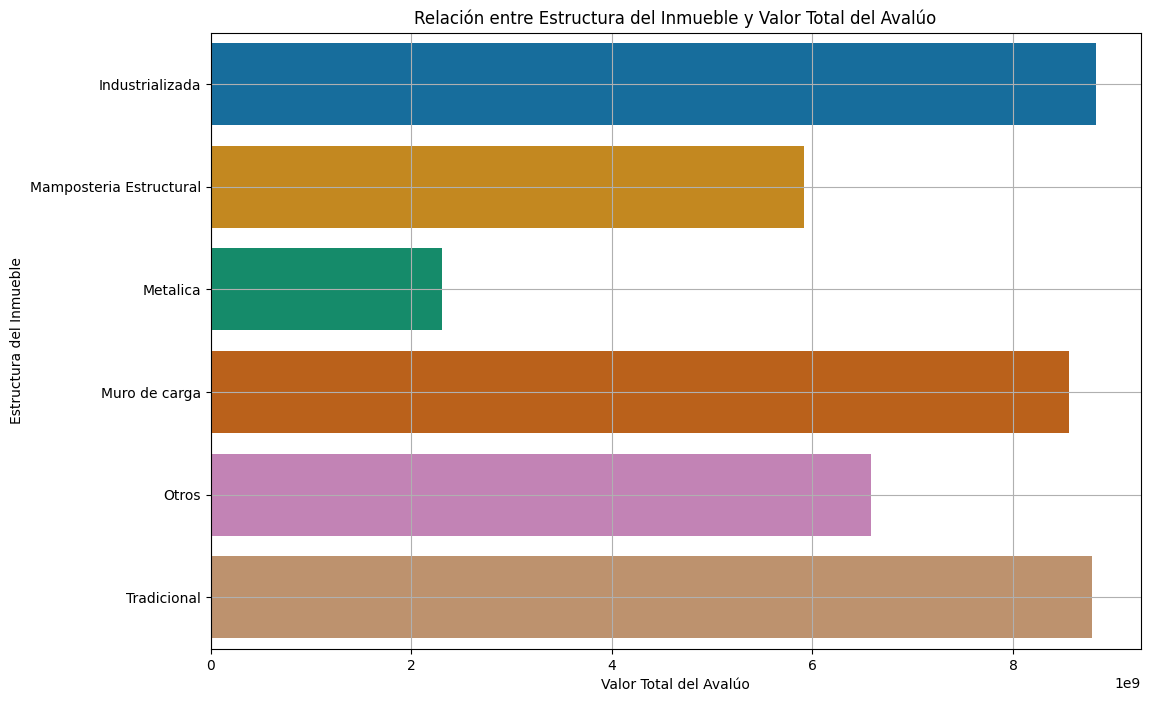

In [ ]:
# Relación entre Estructura del Inmueble y Valor Total del Avalúo
plt.figure(figsize=(12, 8))
sns.barplot(x='valor_total_avaluo', y='estructura', data=data, ci=None, palette='colorblind')

# Añadir título y etiquetas
plt.title('Relación entre Estructura del Inmueble y Valor Total del Avalúo')
plt.xlabel('Valor Total del Avalúo')
plt.ylabel('Estructura del Inmueble')

# Mostrar el gráfico
plt.grid(True)
plt.show()


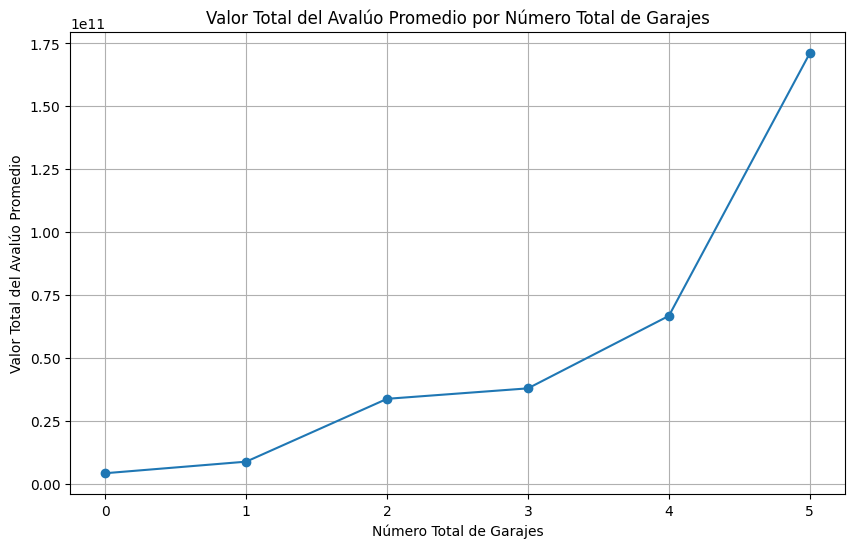

In [ ]:
# Calcular el valor total del avalúo promedio para cada número total de garajes
avg_avaluo_por_garaje = data.groupby('numero_total_de_garajes')['valor_total_avaluo'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(avg_avaluo_por_garaje['numero_total_de_garajes'], avg_avaluo_por_garaje['valor_total_avaluo'], marker='o', linestyle='-')

# Añadir título y etiquetas
plt.title('Valor Total del Avalúo Promedio por Número Total de Garajes')
plt.xlabel('Número Total de Garajes')
plt.ylabel('Valor Total del Avalúo Promedio')

# Mostrar el gráfico
plt.grid(True)
plt.show()


<ipython-input-364-a8e3465cd4ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estrato', y='valor_total_avaluo', data=avg_value_by_estrato, palette='viridis')


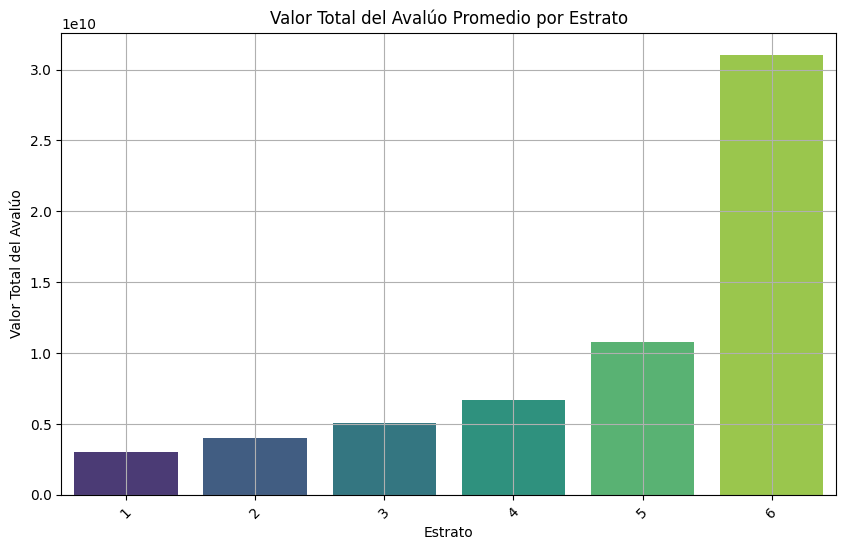

In [ ]:
# Calcular el valor total del avalúo promedio para cada estrato
avg_value_by_estrato = data.groupby('estrato')['valor_total_avaluo'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='estrato', y='valor_total_avaluo', data=avg_value_by_estrato, palette='viridis')

# Añadir título y etiquetas
plt.title('Valor Total del Avalúo Promedio por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Valor Total del Avalúo')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.show()


<ipython-input-365-bb321091df9f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sector', y='valor_total_avaluo', data=data, palette='viridis')


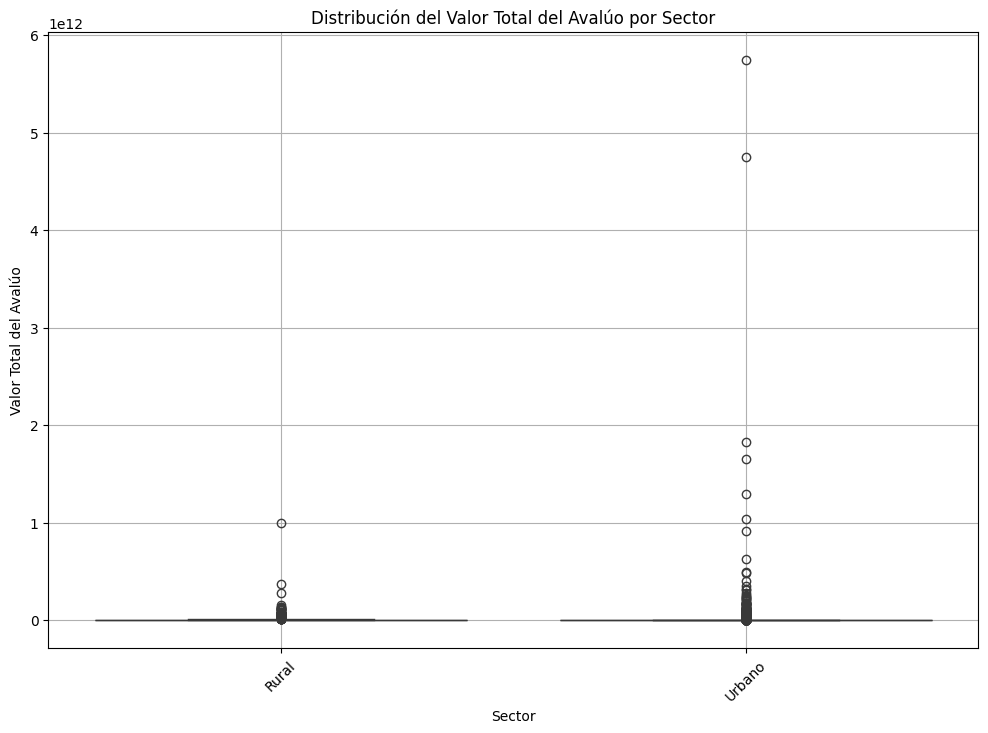

In [ ]:
import seaborn as sns

# Crear el gráfico de caja y bigotes
plt.figure(figsize=(12, 8))
sns.boxplot(x='sector', y='valor_total_avaluo', data=data, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución del Valor Total del Avalúo por Sector')
plt.xlabel('Sector')
plt.ylabel('Valor Total del Avalúo')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.show()


<ipython-input-366-6cda69662489>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='calidad_acabados_pisos', y='valor_total_avaluo', data=data, palette='muted')


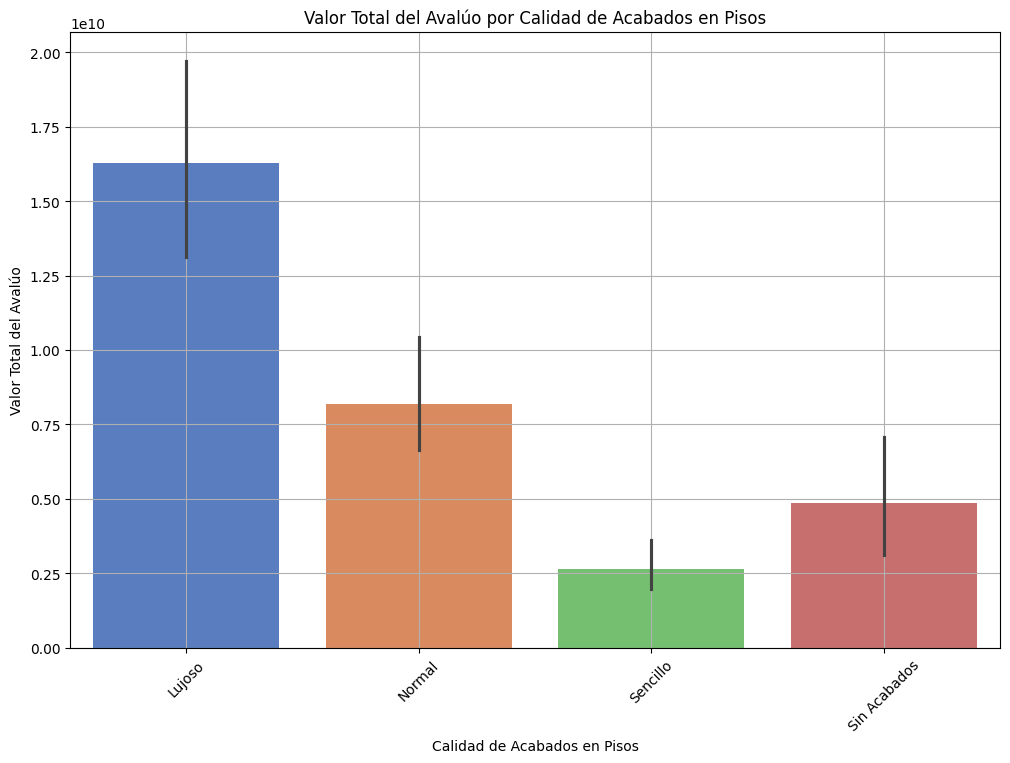

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='calidad_acabados_pisos', y='valor_total_avaluo', data=data, palette='muted')

# Añadir título y etiquetas
plt.title('Valor Total del Avalúo por Calidad de Acabados en Pisos')
plt.xlabel('Calidad de Acabados en Pisos')
plt.ylabel('Valor Total del Avalúo')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.show()


<ipython-input-367-56299e65d9d3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valor_total_avaluo', y='uso_actual', data=avg_value_by_material_sorted, palette='viridis')


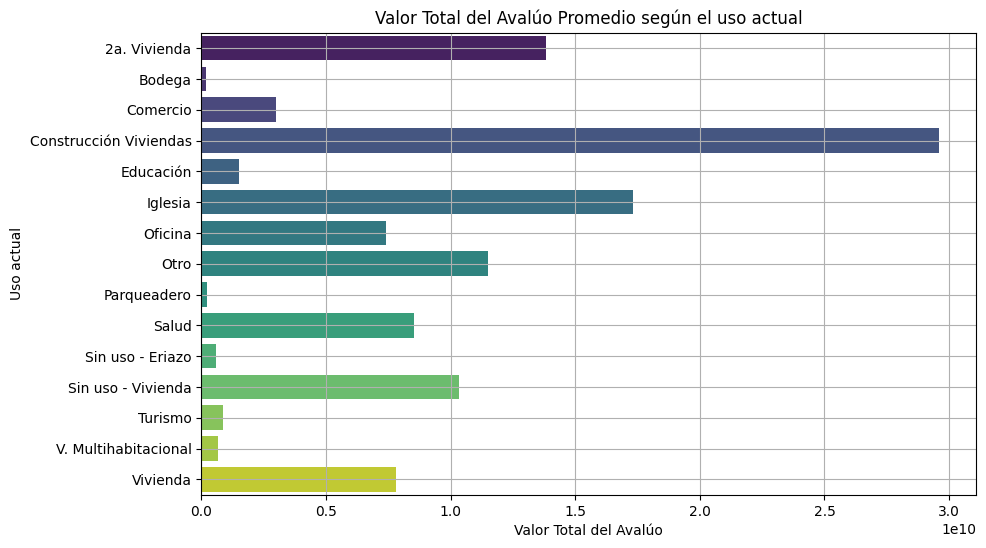

In [ ]:
import seaborn as sns

# Calcular el valor total del avalúo promedio para cada tipo de uso actual
avg_value_by_material = data.groupby('uso_actual')['valor_total_avaluo'].mean().reset_index()

# Ordenar los datos por valor_total_avaluo promedio de manera descendente
avg_value_by_material_sorted = avg_value_by_material.sort_values(by='valor_total_avaluo', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='valor_total_avaluo', y='uso_actual', data=avg_value_by_material_sorted, palette='viridis')

# Añadir título y etiquetas
plt.title('Valor Total del Avalúo Promedio según el uso actual')
plt.xlabel('Valor Total del Avalúo')
plt.ylabel('Uso actual')

# Mostrar el gráfico
plt.grid(True)
plt.show()




<ipython-input-368-0ebfad9cc08a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='material_de_construccion', y='valor_total_avaluo', data=data, palette='muted')


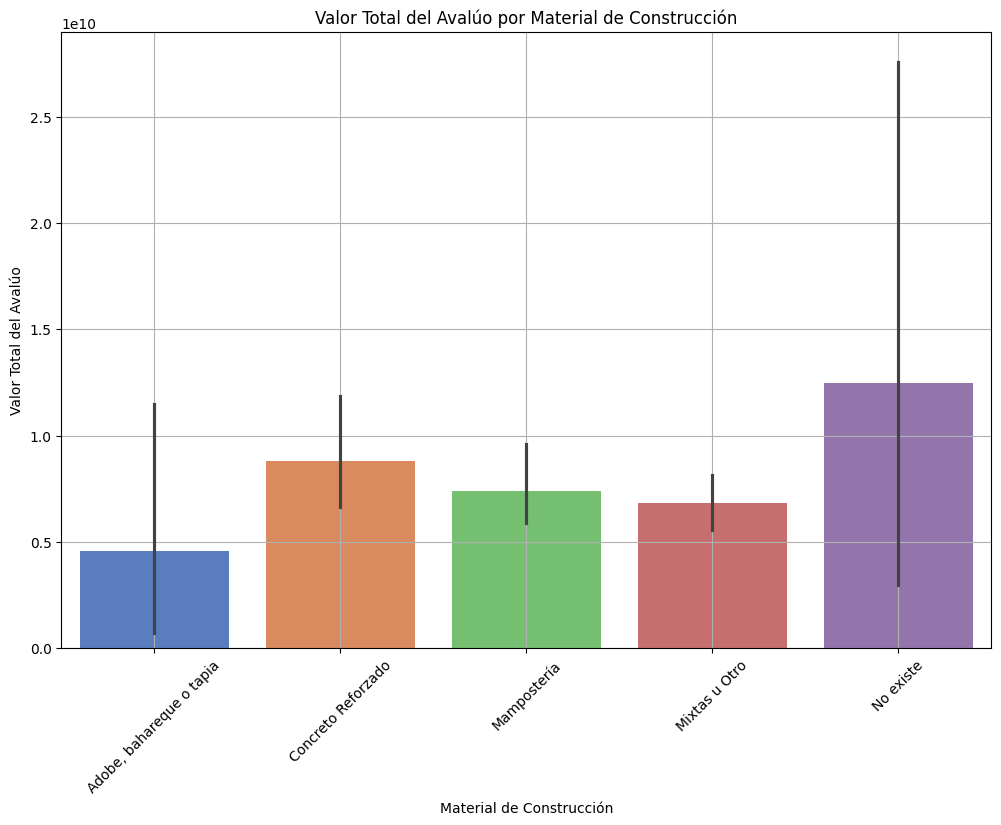

In [ ]:
import seaborn as sns

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='material_de_construccion', y='valor_total_avaluo', data=data, palette='muted')

# Añadir título y etiquetas
plt.title('Valor Total del Avalúo por Material de Construcción')
plt.xlabel('Material de Construcción')
plt.ylabel('Valor Total del Avalúo')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.show()


<ipython-input-369-62040c2e3171>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='valor_total_avaluo', y='fachada', data=data, ci=None, palette='colorblind')
<ipython-input-369-62040c2e3171>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valor_total_avaluo', y='fachada', data=data, ci=None, palette='colorblind')


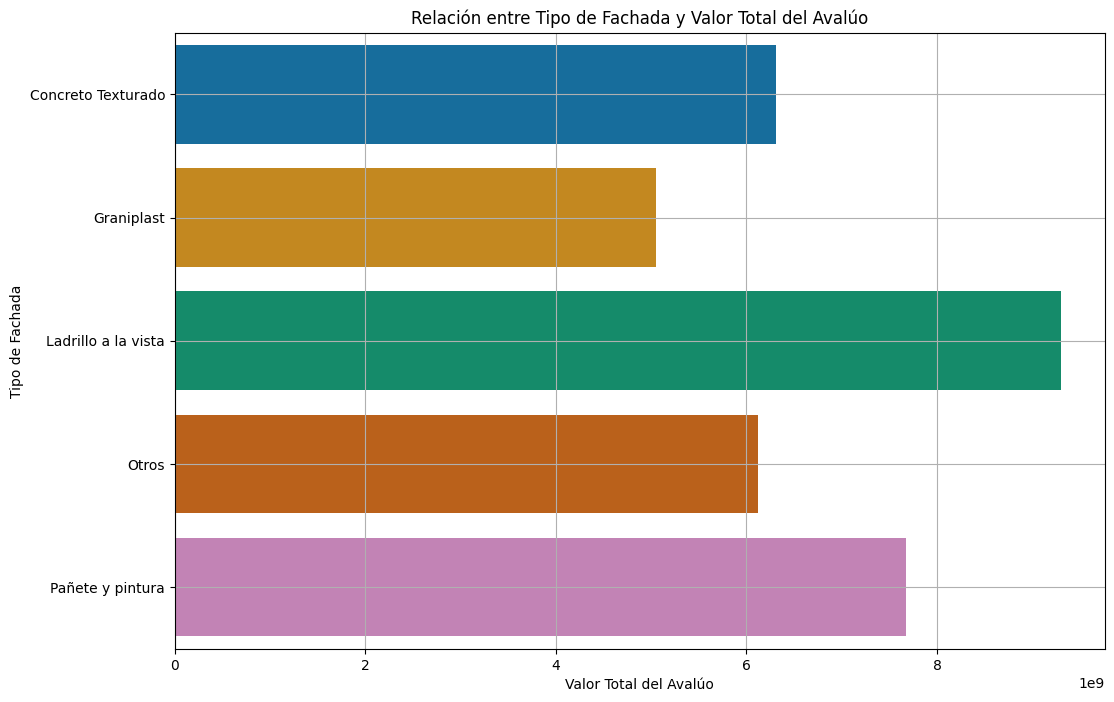

In [ ]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='valor_total_avaluo', y='fachada', data=data, ci=None, palette='colorblind')

# Añadir título y etiquetas
plt.title('Relación entre Tipo de Fachada y Valor Total del Avalúo')
plt.xlabel('Valor Total del Avalúo')
plt.ylabel('Tipo de Fachada')

# Mostrar el gráfico
plt.grid(True)
plt.show()


# Estandarización variables float

In [ ]:
variables_to_standardize = [
'valor_area_libre', 'valor_total_avaluo', 'valor_uvr', 'valor_avaluo_en_uvr',
  'area_valorada', 'area_privada','valor_area_privada', 'area_garaje', 'valor_area_garaje',
       'area_deposito', 'valor_area_deposito', 'area_terreno',
       'valor_area_terreno', 'area_construccion', 'valor_area_construccion',
       'area_otros', 'valor_area_otros',
]

In [ ]:
# Estandarizar las variables especificadas
scaler = StandardScaler()

# Filtrar las columnas
columns_to_scale = [col for col in variables_to_standardize if col in data.columns]

# Aplicar estandarización a las columnas seleccionadas
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Verificar que la estandarización se ha aplicado imprimiendo las primeras filas
print(data[columns_to_scale].head())


   valor_area_libre  valor_total_avaluo  area_valorada  area_privada  \
0         -0.038536            0.083988      -0.209708     -0.221829   
1         -0.038536           -0.089310      -0.198084     -0.185646   
2         -0.038536           -0.094872      -0.214302     -0.210193   
3         -0.038536            0.008138       0.232552      0.466115   
4         -0.038536           -0.097056      -0.214066     -0.221829   

   valor_area_privada  valor_area_garaje  area_deposito  valor_area_deposito  \
0           -0.286059          -0.027297      -0.108259            -0.020323   
1           -0.245131          -0.027297      -0.108259            -0.020323   
2           -0.270216          -0.020723      -0.090833            -0.011748   
3            0.260355          -0.027297      -0.108259            -0.020323   
4           -0.286059          -0.027297      -0.108259            -0.020323   

   area_terreno  valor_area_terreno  area_construccion  \
0      0.031894            0

# Modelos

## SVM

In [ ]:
# seleccionar columnas de tipo 'object'
object_columns = data.select_dtypes(include='object').columns

# Imprime el listado de columnas tipo 'object'
print(object_columns)

Index([], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import copy

# Verificar la presencia de la columna objetivo antes de proceder
if 'valor_total_avaluo' in data.columns:
    print("Columna 'valor_total_avaluo' encontrada")
else:
    raise ValueError("La columna 'valor_total_avaluo' no está presente en el DataFrame.")

# División del DataFrame en características y variable objetivo
y = data['valor_total_avaluo']
X = data.drop('valor_total_avaluo', axis=1)

# Crear copia profunda para evitar modificaciones no deseadas durante la transformación
X_safe = copy.deepcopy(X)

# Identificación de columnas numéricas y categóricas
numerical_cols = X_safe.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_safe.select_dtypes(include=['category', 'object']).columns.tolist()

# Configuración de transformadores para variables numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_safe, y, test_size=0.2, random_state=42)

# Aplicar el preprocesamiento
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Crear e instanciar el modelo SVM
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_prepared, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = svm_model.predict(X_test_prepared)

# Mostrar métricas de rendimiento
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")


Columna 'valor_total_avaluo' encontrada
MSE: 0.019484593980862126
R^2: 0.9013217558233979


In [ ]:
# coeficiente de pearson
pearson_correlation = np.corrcoef(y_test, y_pred)[0, 1]
print("Coeficiente de correlación de Pearson:", pearson_correlation)

Coeficiente de correlación de Pearson: 0.949723545436339


## Red Neuronal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import copy

# Verificar la presencia de la columna objetivo antes de proceder
if 'valor_total_avaluo' in data.columns:
    print("Columna 'valor_total_avaluo' encontrada")
else:
    raise ValueError("La columna 'valor_total_avaluo' no está presente en el DataFrame.")

# División del DataFrame en características y variable objetivo
y = data['valor_total_avaluo']
X = data.drop('valor_total_avaluo', axis=1)

# Crear copia profunda para evitar modificaciones no deseadas durante la transformación
X_safe = copy.deepcopy(X)

# Identificación de columnas numéricas y categóricas
numerical_cols = X_safe.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_safe.select_dtypes(include=['category', 'object']).columns.tolist()

# Configuración de transformadores para variables numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_safe, y, test_size=0.2, random_state=42)

# Aplicar el preprocesamiento
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Crear e instanciar el modelo de Red Neuronal
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                        learning_rate='constant', learning_rate_init=0.001, max_iter=200, random_state=42)

nn_model.fit(X_train_prepared, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = nn_model.predict(X_test_prepared)

# Calcular y mostrar métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Neural Network MSE: {mse}")
print(f"Neural Network R^2: {r2}")


Columna 'valor_total_avaluo' encontrada
Neural Network MSE: 0.010685097742335031
Neural Network R^2: 0.9458861352151028


In [ ]:
# coeficiente de pearson
pearson_correlation = np.corrcoef(y_test, y_pred)[0, 1]
print("Coeficiente de correlación de Pearson:", pearson_correlation)

Coeficiente de correlación de Pearson: 0.9802320685152074


## Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import copy

# Verificar la presencia de la columna objetivo antes de proceder
if 'valor_total_avaluo' in data.columns:
    print("Columna 'valor_total_avaluo' encontrada")
else:
    raise ValueError("La columna 'valor_total_avaluo' no está presente en el DataFrame.")

# División del DataFrame en características y variable objetivo
y = data['valor_total_avaluo']
X = data.drop('valor_total_avaluo', axis=1)

# Crear copia profunda para evitar modificaciones no deseadas durante la transformación
X_safe = copy.deepcopy(X)

# Identificación de columnas numéricas y categóricas
numerical_cols = X_safe.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_safe.select_dtypes(include=['category', 'object']).columns.tolist()

# Configuración de transformadores para las variables numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_safe, y, test_size=0.2, random_state=42)

# Aplicar el preprocesamiento
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Crear e instanciar el modelo de Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_prepared, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = forest_model.predict(X_test_prepared)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Imprimir las métricas
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


Columna 'valor_total_avaluo' encontrada
MSE: 0.03
R^2: 0.87


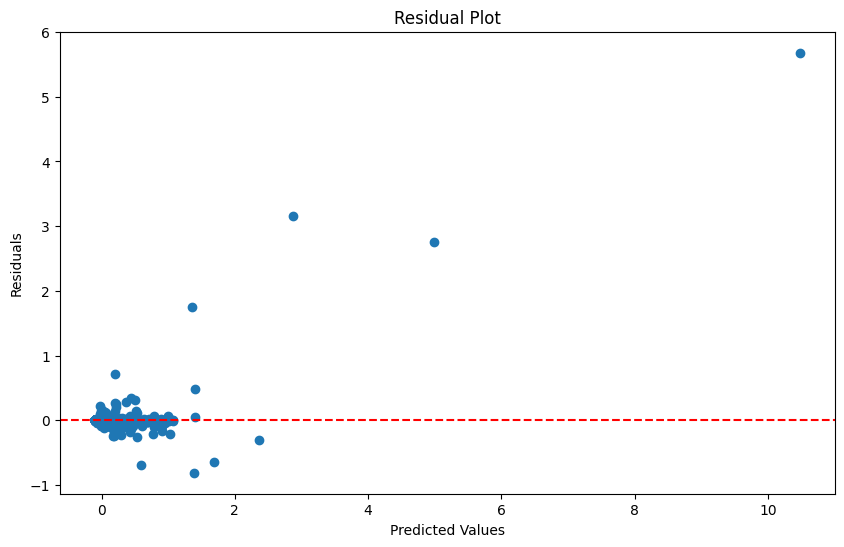

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Evaluación en el conjunto de entrenamiento
y_train_pred = forest_model.predict(X_train_prepared)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las métricas de entrenamiento
print(f"Train MSE: {mse_train:.2f}, Train R^2: {r2_train:.2f}")

# Imprimir las métricas de prueba
print(f"Test MSE: {mse:.2f}, Test R^2: {r2:.2f}")

Train MSE: 0.12, Train R^2: 0.90
Test MSE: 0.03, Test R^2: 0.87


In [ ]:
# coeficiente de pearson
pearson_correlation = np.corrcoef(y_test, y_pred)[0, 1]
print("Coeficiente de correlación de Pearson:", pearson_correlation)

Coeficiente de correlación de Pearson: 0.9690779574391244


## Regresión Lineal predictora

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import copy

# Verificar la presencia de la columna objetivo antes de proceder
if 'valor_total_avaluo' in data.columns:
    print("Columna 'valor_total_avaluo' encontrada")
else:
    raise ValueError("La columna 'valor_total_avaluo' no está presente en el DataFrame.")

# División del DataFrame en características y variable objetivo
y = data['valor_total_avaluo']
X = data.drop('valor_total_avaluo', axis=1)

# Crear copia profunda para evitar modificaciones no deseadas durante la transformación
X_safe = copy.deepcopy(X)

# Identificación de columnas numéricas y categóricas
numerical_cols = X_safe.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_safe.select_dtypes(include=['category', 'object']).columns.tolist()

# Configuración de transformadores para variables numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_safe, y, test_size=0.2, random_state=42)

# Aplicar el preprocesamiento
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Crear e instanciar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train_prepared, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = linear_model.predict(X_test_prepared)

# Calcular y mostrar métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


Columna 'valor_total_avaluo' encontrada
MSE: 0.02
R^2: 0.92


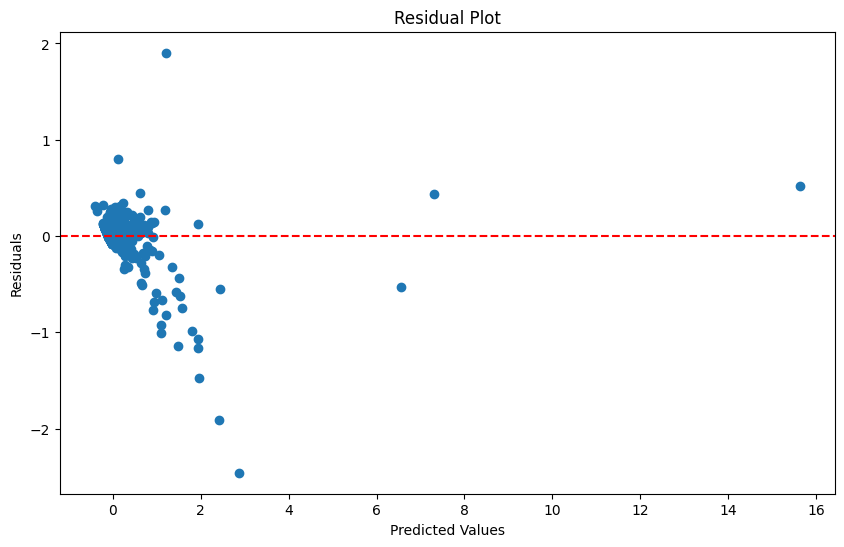

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


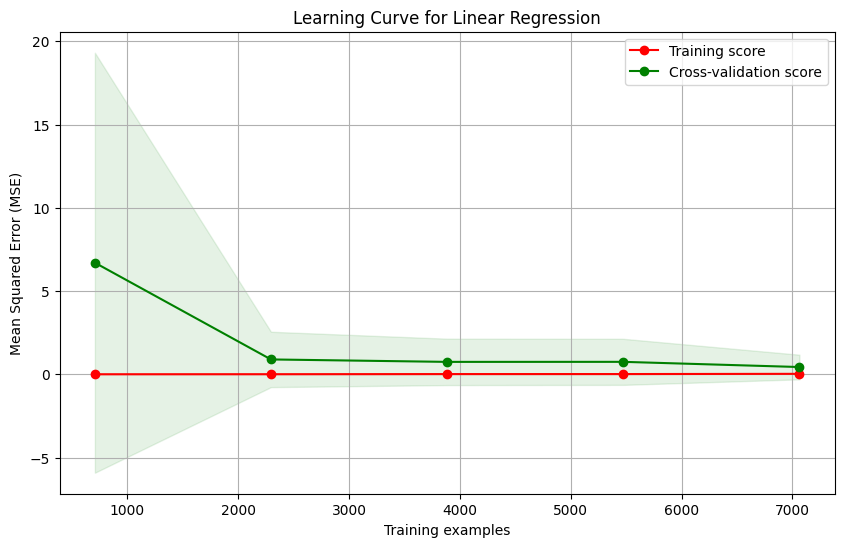

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    linear_model, X_train_prepared, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5))

# Invertir los signos de las puntuaciones MSE porque "neg_mean_squared_error" devuelve valores negativos
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = -train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = -test_scores.std(axis=1)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Rellenar entre la media ± desviación estándar
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Etiquetas
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [ ]:
# Evaluación en el conjunto de entrenamiento
y_train_pred = linear_model.predict(X_train_prepared)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Comparar con los resultados de prueba
print(f"Train MSE: {mse_train}, Train R^2: {r2_train}")
print(f"Test MSE: {mse}, Test R^2: {r2}")


Train MSE: 0.030404860946618758, Train R^2: 0.9746757396605122
Test MSE: 0.015351057168024752, Test R^2: 0.9222557386064506


In [ ]:
# coeficiente de pearson
pearson_correlation = np.corrcoef(y_test, y_pred)[0, 1]
print("Coeficiente de correlación de Pearson:", pearson_correlation)

Coeficiente de correlación de Pearson: 0.9618747128437726


In [ ]:
from sklearn.model_selection import cross_val_score


# Realizar validación cruzada con
cross_val_scores = cross_val_score(linear_model, X_train_prepared, y_train, cv=10)

# Imprimir los resultados
print("R^2 por fold:", cross_val_scores)
print("Promedio R^2 :", cross_val_scores.mean())
print("Desviación de R^2s:", cross_val_scores.std())


R^2 por fold: [0.95334885 0.78601761 0.6761471  0.9535919  0.65821393 0.67664256
 0.3531885  0.80067592 0.76977833 0.70917573]
Promedio R^2 : 0.7336780425596098
Desviación de R^2s: 0.16210462341325385


## Arbol de Regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Crear e instanciar el modelo de árbol de regresión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_prepared, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test_prepared)

# Calcular métricas de rendimiento
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Imprimir las métricas
print(f"Decision Tree Regressor MSE: {mse_tree:.2f}")
print(f"Decision Tree Regressor R^2: {r2_tree:.2f}")

Decision Tree Regressor MSE: 0.02
Decision Tree Regressor R^2: 0.89


In [ ]:
# Evaluación en el conjunto de entrenamiento
y_train_pred_tree = tree_model.predict(X_train_prepared)
mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
r2_train_tree = r2_score(y_train, y_train_pred_tree)

# Evaluación en el conjunto de prueba
mse_test_tree = mean_squared_error(y_test, y_pred_tree)
r2_test_tree = r2_score(y_test, y_pred_tree)

# Imprimir las métricas de entrenamiento y prueba
print(f"Train MSE: {mse_train_tree:.2f}, Train R^2: {r2_train_tree:.2f}")
print(f"Test MSE: {mse_test_tree:.2f}, Test R^2: {r2_test_tree:.2f}")

Train MSE: 0.00, Train R^2: 1.00
Test MSE: 0.02, Test R^2: 0.89


In [ ]:
# coeficiente de pearson
pearson_correlation = np.corrcoef(y_test, y_pred_tree)[0, 1]
print("Coeficiente de correlación de Pearson:", pearson_correlation)

Coeficiente de correlación de Pearson: 0.9504798922971527


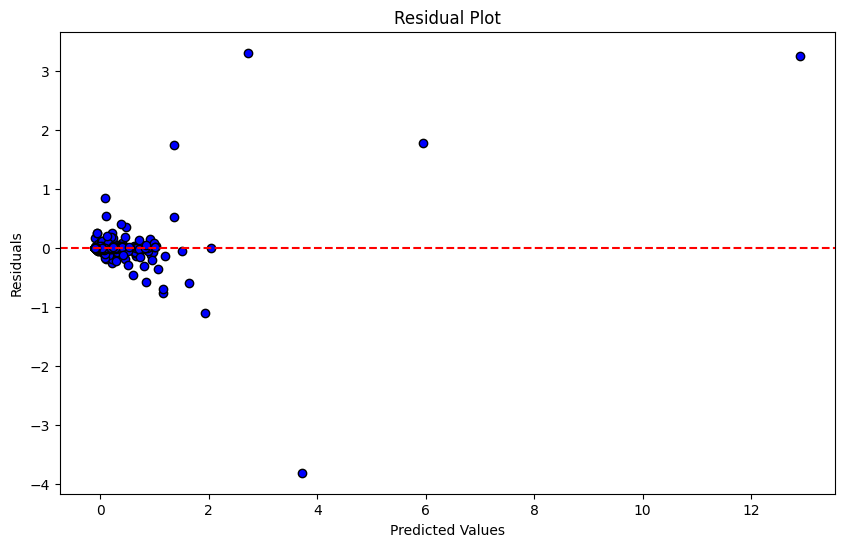

In [ ]:
# Análisis de residuos
residuals = y_test - y_pred_tree

# Plot de residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_tree, residuals, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

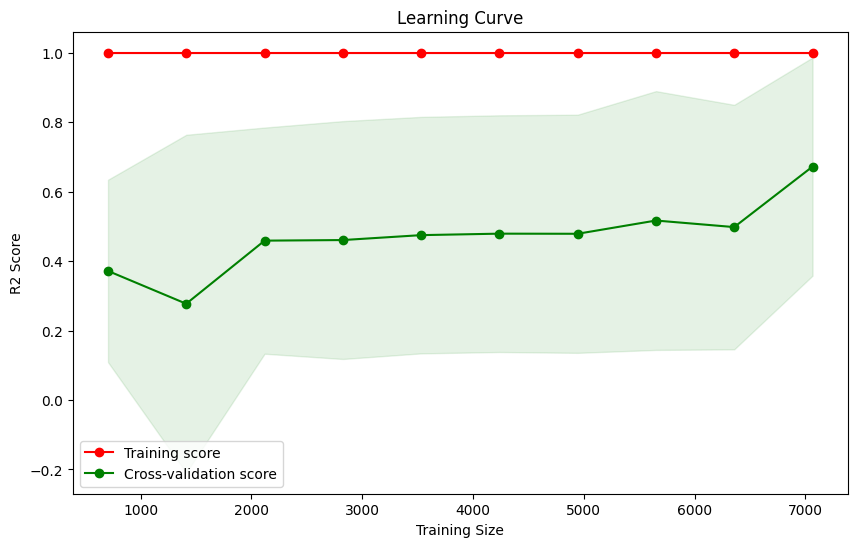

In [ ]:
# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(tree_model, X_train_prepared, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Media y desviación estándar del score de entrenamiento
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Media y desviación estándar del score de test
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot de la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend(loc="best")
plt.show()

In [ ]:
# Realizar validación cruzada
cross_val_scores_r2_tree = cross_val_score(tree_model, X_train_prepared, y_train, cv=10, scoring='r2')

# Imprimir resultados de la validación cruzada
print("Cross-validated R^2 scores:", cross_val_scores_r2_tree)
print("Average R^2 score:", cross_val_scores_r2_tree.mean())


Cross-validated R^2 scores: [0.98250109 0.59286333 0.90593847 0.61825838 0.51928273 0.85860206
 0.10139767 0.92900142 0.94882955 0.93660066]
Average R^2 score: 0.7393275365845524
